# Wine Quality Analysis

This notebook provides a comprehensive analysis of the Wine Quality dataset, focusing on identifying key factors that influence wine quality. The analysis includes data exploration, statistical analysis, and predictive modeling.

---

## Table of Contents

1. **Introduction**
   - Overview of the Dataset
   - Analysis Goals

2. **Data Exploration**
   - Univariate Analysis
   - Bivariate Analysis
   - Correlation Analysis

3. **Data Preprocessing**
   - Outlier Detection and Treatment
   - Feature Transformation

4. **Statistical Analysis**
   - Hypothesis Testing
   - Key Insights

5. **Predictive Modeling**
   - Linear Regression
   - Logistic Regression
   - Model Evaluation

6. **Conclusion and Next Steps**
   - Summary of Findings
   - Future Recommendations

---

In [104]:
# For data manipulation
import pandas as pd
import numpy as np

# For visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# For statistical analysis
import statsmodels.api as sm
from scipy import stats
import pingouin as pg

# For machine learning and regressions
from sklearn.metrics import (
    auc, 
    roc_curve,
    classification_report, 
    confusion_matrix, 
    precision_recall_curve, 
    precision_score, 
    recall_score, 
    f1_score,
    mean_squared_error, 
    r2_score
)

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression

# Importing helper functions from utils.py
from wine_quality_utils import (
    plot_heatmap,
    create_qq_plot,
    create_distributions,
    create_distributions_with_qqplot,
    outliers_count,
    fit_and_evaluate_model, 
    preprocess_data, 
    plot_diagnostic_plots, 
    plot_cooks_distance, 
    extract_and_rank_model_metrics,
    generate_partial_residual_plots
)

In [105]:
import warnings
warnings.filterwarnings("ignore")

plot_style = {
    'figure.figsize': (10, 6),
    'font.size': 12,
    'axes.labelsize': 12,
    'axes.titlesize': 12
}

plt.rcParams.update(plot_style)
sns.set_context(rc=plot_style)
sns.despine(left=True, bottom=True)

<Figure size 1000x600 with 0 Axes>

In [106]:
wine_data = pd.read_csv("winequality-red.csv")

## Understanding the Data
i. Previewing the data 

ii. Looking at the dataframe structure, missing values, data types,duplicated rows 

iii. Summary stastiscs

----

**Preview**

In [107]:
display(wine_data.head())

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [108]:
display(wine_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


None

- No missing values
- All features are numerical 

In [109]:
print(f'The number of duplicated rows in the dataset are: {wine_data.duplicated().sum()}')

The number of duplicated rows in the dataset are: 240


- Dropping the duplicate rows 

In [110]:
wine_data = wine_data.drop_duplicates()

**Feature Descriptions:**
- **Fixed acidity**: most acids involved with wine or fixed or nonvolatile (do not evaporate readily).

- **Volatile acidity**: the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste.

- **Citric acid**: found in small quantities, citric acid can add 'freshness' and flavor to wines.

- **Residual sugar**: the amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet.

- **Chlorides**: the amount of salt in the wine.

- **Free sulfur dioxide**: the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine.

- **Total sulfur dioxide**: amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine.

- **Density**: the density is close to that of water depending on the percent alcohol and sugar content.

- **pH**: describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale

- **Sulphates**: a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant.

- **Alcohol**: the percent alcohol content of the wine.

- **Quality**: (score between 0 and 10) -  Output variable (based on sensory data):
 

In [111]:
summary_statistics = wine_data.describe()

In [112]:
display(summary_statistics)

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1359.000000       1359.000000  1359.000000     1359.000000   
mean        8.310596          0.529478     0.272333        2.523400   
std         1.736990          0.183031     0.195537        1.352314   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.430000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1359.000000          1359.000000           1359.000000  1359.000000   
mean      0.088124            15.893304             46.825975     0.996709   
std       0.049377            10.447270             33.408946     0.001869   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996700   
75%       0.091000            21.000000             63.000000     0.997820   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1359.000000  1359.000000  1359.000000  1359.000000  
mean      3.309787     0.658705    10.432315     5.623252  
std       0.155036     0.170667     1.082065     0.823578  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

# Univariate Analysis
-  without preprocessing Data

Distrbution of quality of wines


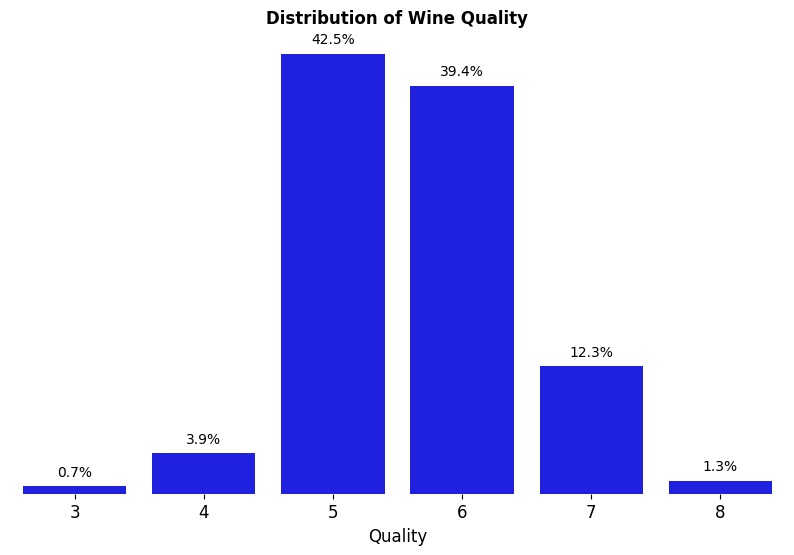

In [113]:
quality_counts = wine_data['quality'].value_counts(normalize=True) * 100

fig, ax = plt.subplots()
barplot = sns.barplot(x=quality_counts.index, y=quality_counts.values, color="blue", ax=ax)

ax.bar_label(ax.containers[0], fmt='%.1f%%', label_type='edge', padding=5, color='black', fontsize=10)

ax.set_ylabel('')
ax.set_yticks([])
ax.set_xlabel('Quality')
ax.set_title('Distribution of Wine Quality', fontweight='bold')
sns.despine(left=True, bottom=True)

plt.show()

- We can define wine quality greater than 6 as high quality wine i.e quality 7 and 8

In [114]:
print('Our sample data for high quality wine is :' ,wine_data[wine_data['quality'] > 6].shape[0])

Our sample data for high quality wine is : 184


- The sample size would be important for statistical analysis later

### Understand the basic properties of the dataset,
  - distribution of data for each feature
  - presence of outliers, and general data quality.


**Visualizing the Distribution of data for each features**

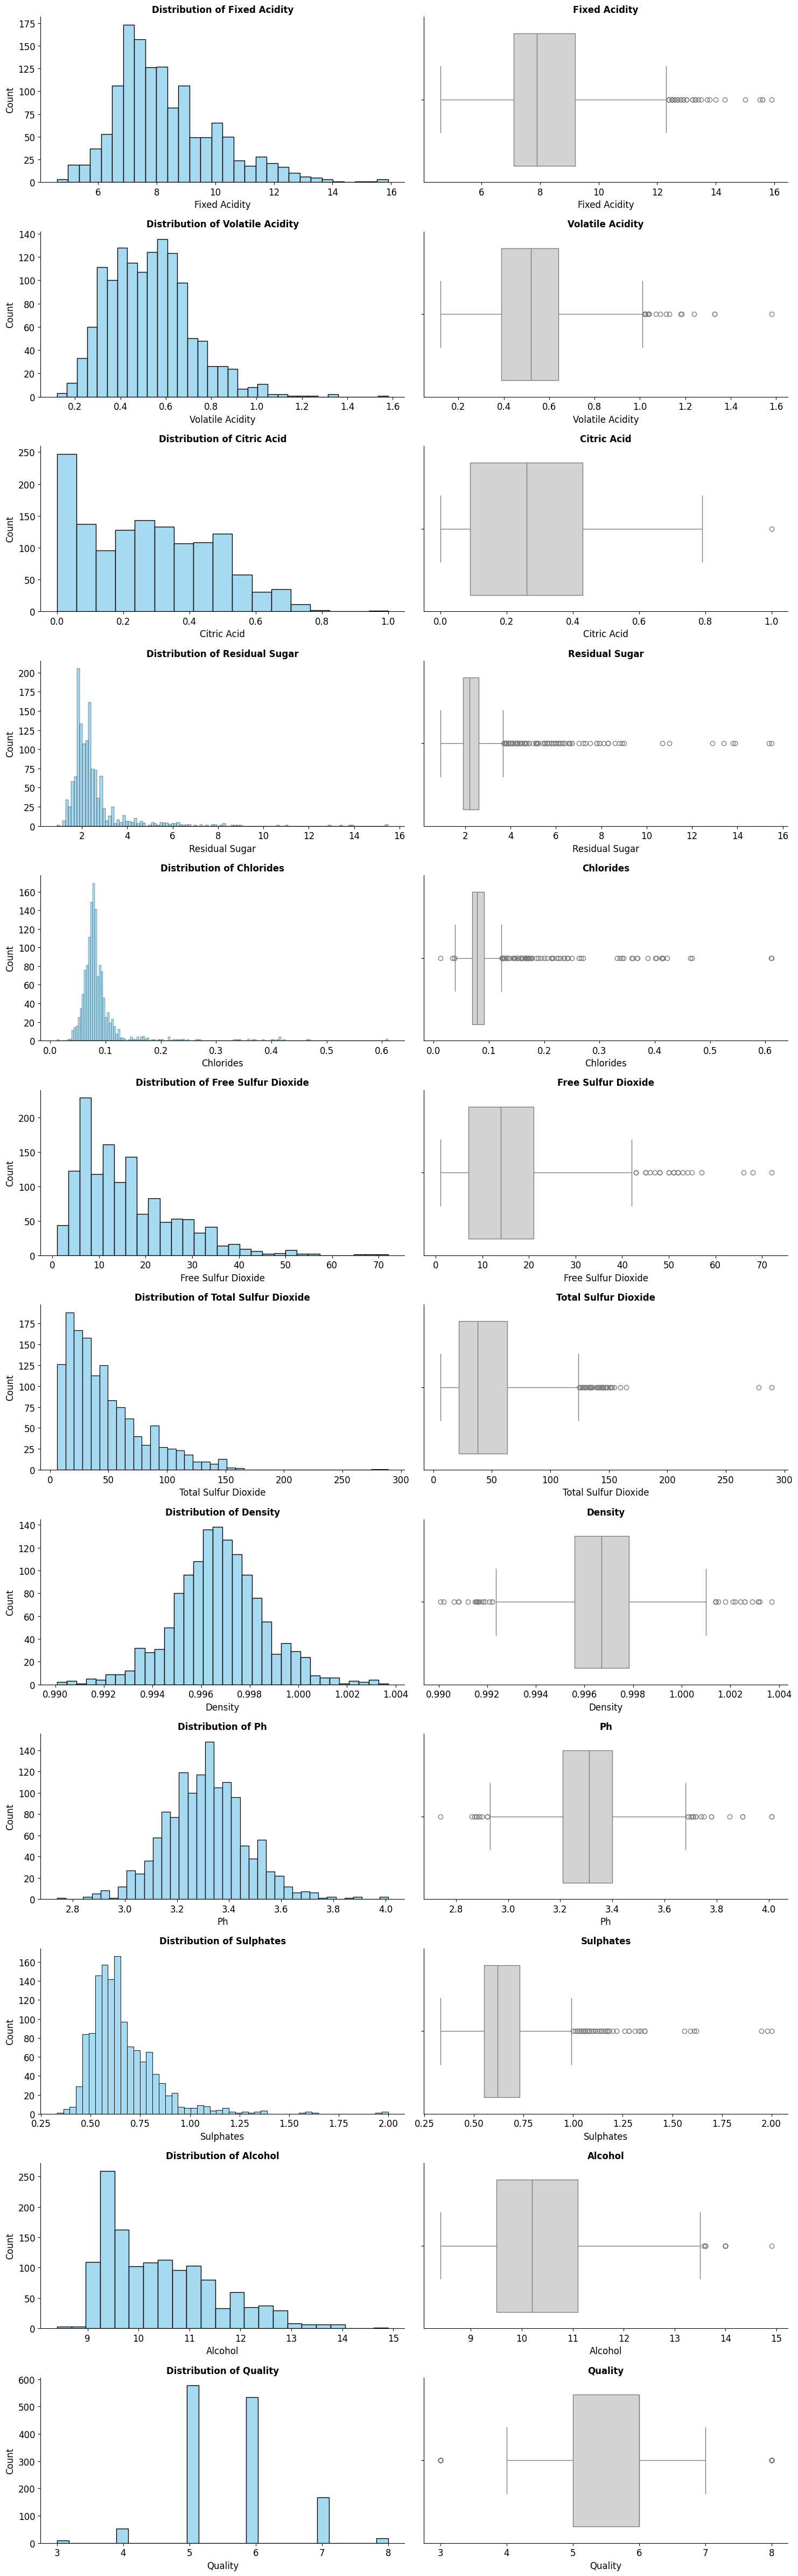

In [115]:
create_distributions(wine_data)


From Histograms: 

**Right-Skewed Features:**
- Fixed Acidity
- Volatile Acidity
- Citric Acid (with a major peak at low values)
- Residual Sugar (highly skewed)
- Chlorides
- Free Sulfur Dioxide
- Total Sulfur Dioxide
- Alcohol (slight skew)

**Normally Distributed:**
- Density (slight right skew)
- pH

**Other Observations:**
- Quality: Somewhat normal, centered around the median, with fewer very low or very high ratings

-------------

From Boxplots
#### **Boxplots**

**Outliers:**
- Present in Residual Sugar, Chlorides, Free Sulfur Dioxide, and Total Sulfur Dioxide.

**Data Spread:**
- Significant variability in Fixed Acidity, Residual Sugar, and Sulfur Dioxide.

**Median Alignment:**
- Most medians are off-center, confirming skewness seen in histograms.


#### Quantifying distribution properties

In [116]:
outliers_count(wine_data).sort_values(by = ["Skewness"], ascending  = False)

Outliers  Extreme Outliers  Skewness
chlorides                   87                60  5.502487
residual sugar             126                70  4.548153
sulphates                   55                15  2.406505
total sulfur dioxide        45                 2  1.540368
free sulfur dioxide         26                 3  1.226579
fixed acidity               41                 4  0.941041
alcohol                     12                 0  0.859841
volatile acidity            19                 1  0.729279
citric acid                  1                 0  0.312726
pH                          28                 2  0.232032
quality                     27                 0  0.192407
density                     35                 0  0.044778

Highly skewed features
- Residual Sugar
- Chlorides
- Sulphates
- Free Sulfur Dioxide
- Total Sulfur Dioxide

- Features with high number of outliers and extreme outliers have high skewness as well. 
- These properties needs to be treated when doing statistical analysis and modeling later on.

**Note!**

Using the IQR method, wine ratings of 3 and 8 are outliers, but given the context, it's important not to discard them. Most ratings fall around 5 or 6, yet these outliers hold valuable information.


In [117]:
wine_data['quality'].value_counts()

quality
5    577
6    535
7    167
4     53
8     17
3     10
Name: count, dtype: int64

**Checking for normality of features** - for subsequent correlation analysis 

- Pearson correlation assumes the two variables to be normally distributed. 
- If variables are non normal we can look at alternative correlation analysis.

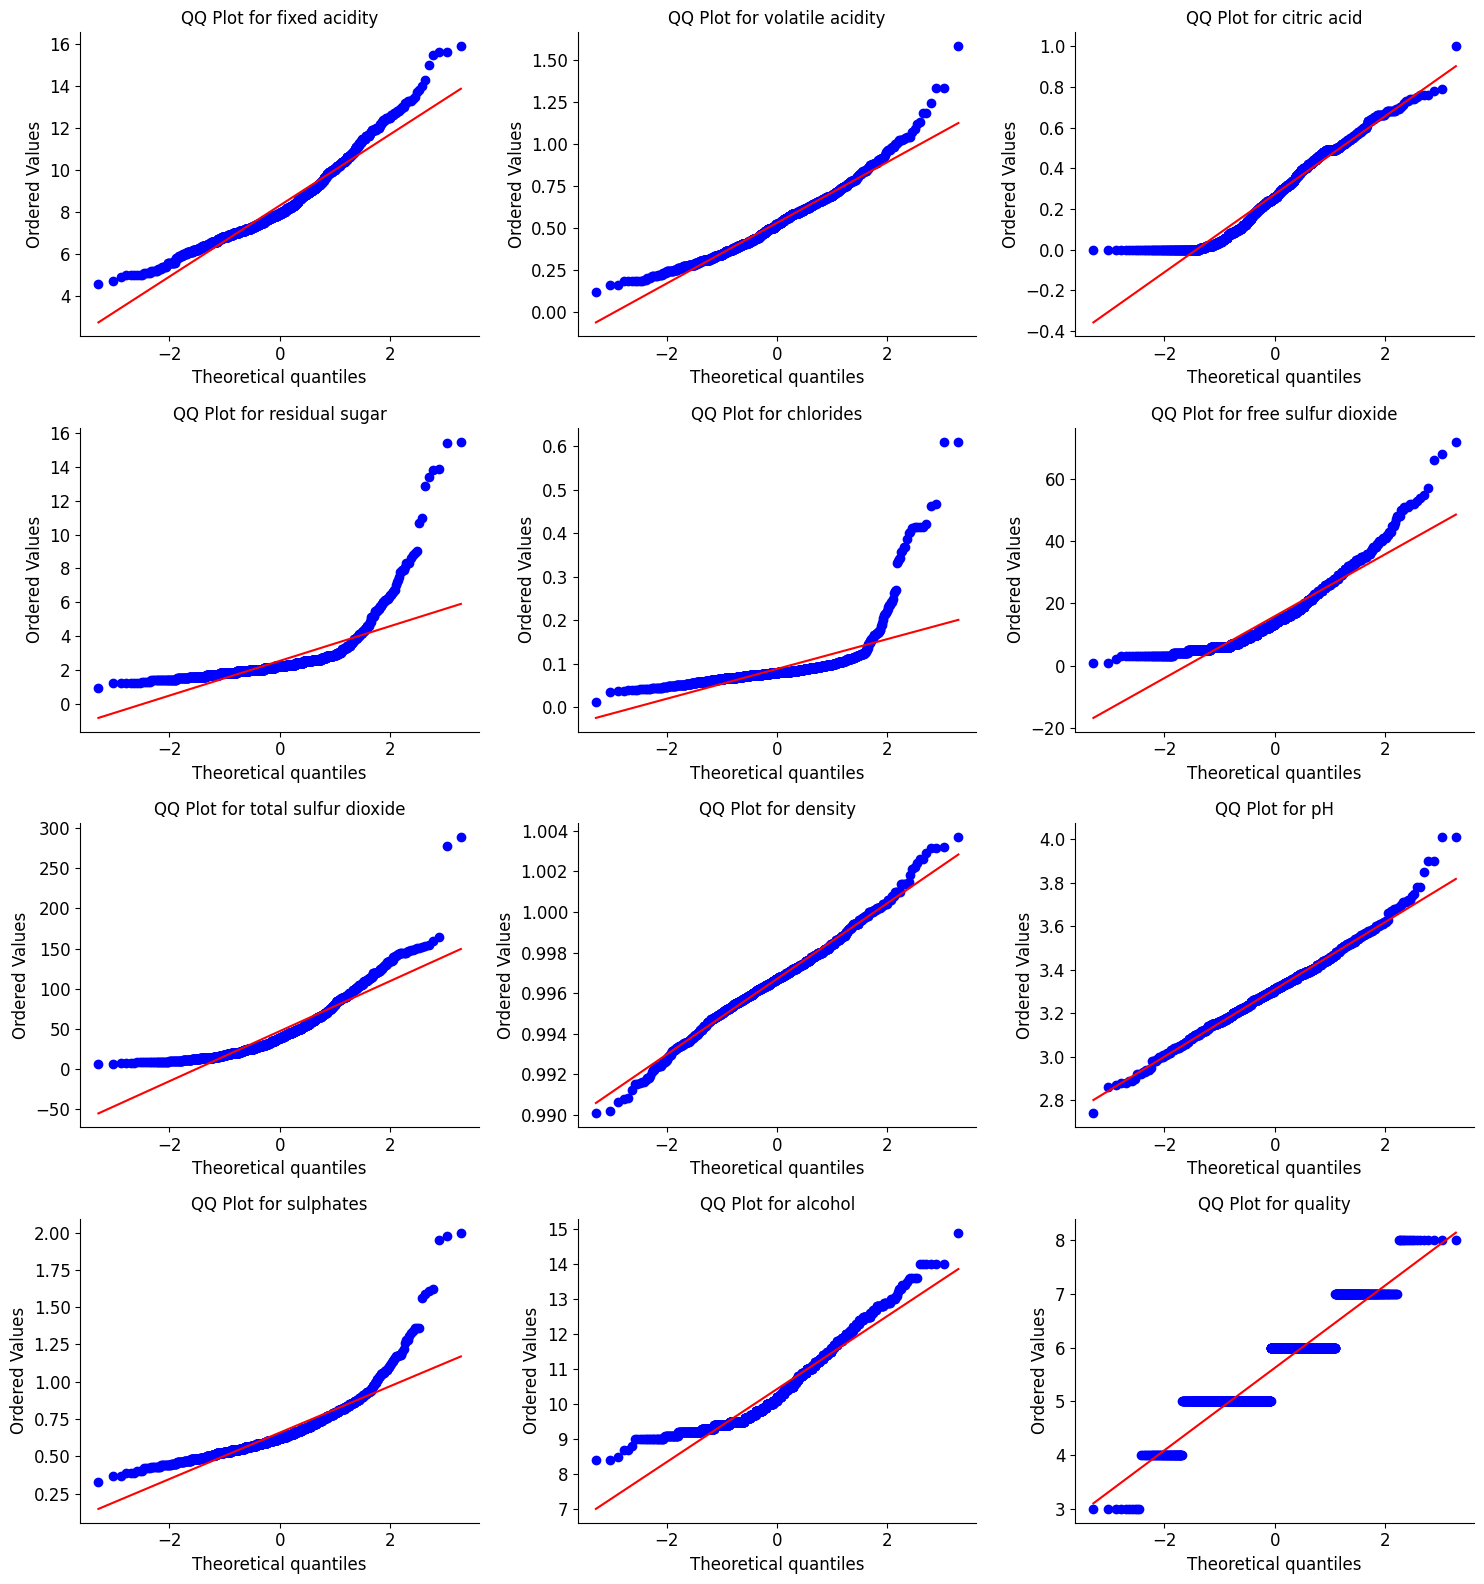

In [118]:
num_cols = wine_data.select_dtypes(include=['float64', 'int64']).columns
n_cols = 3
n_rows = (len(num_cols) + 2) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    create_qq_plot(wine_data, col, axes[i])

for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes[j])

fig.tight_layout()
sns.despine()
plt.show()

- Deviations: Points that deviate significantly from the line indicate non-normality.
- Residual Sugar, Chloride, Sulphate deviate significantly in the upper tail, which corresponds to extreme outliers and we have outliers as well.
- Many of the featurs doesn't show good normal distrbution. 

**For pearson correlation and other statisical analysis normality of features are assumed.**


Looking more closely at features with very high skewness:

In [119]:
high_skewed_features = ['residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'sulphates']

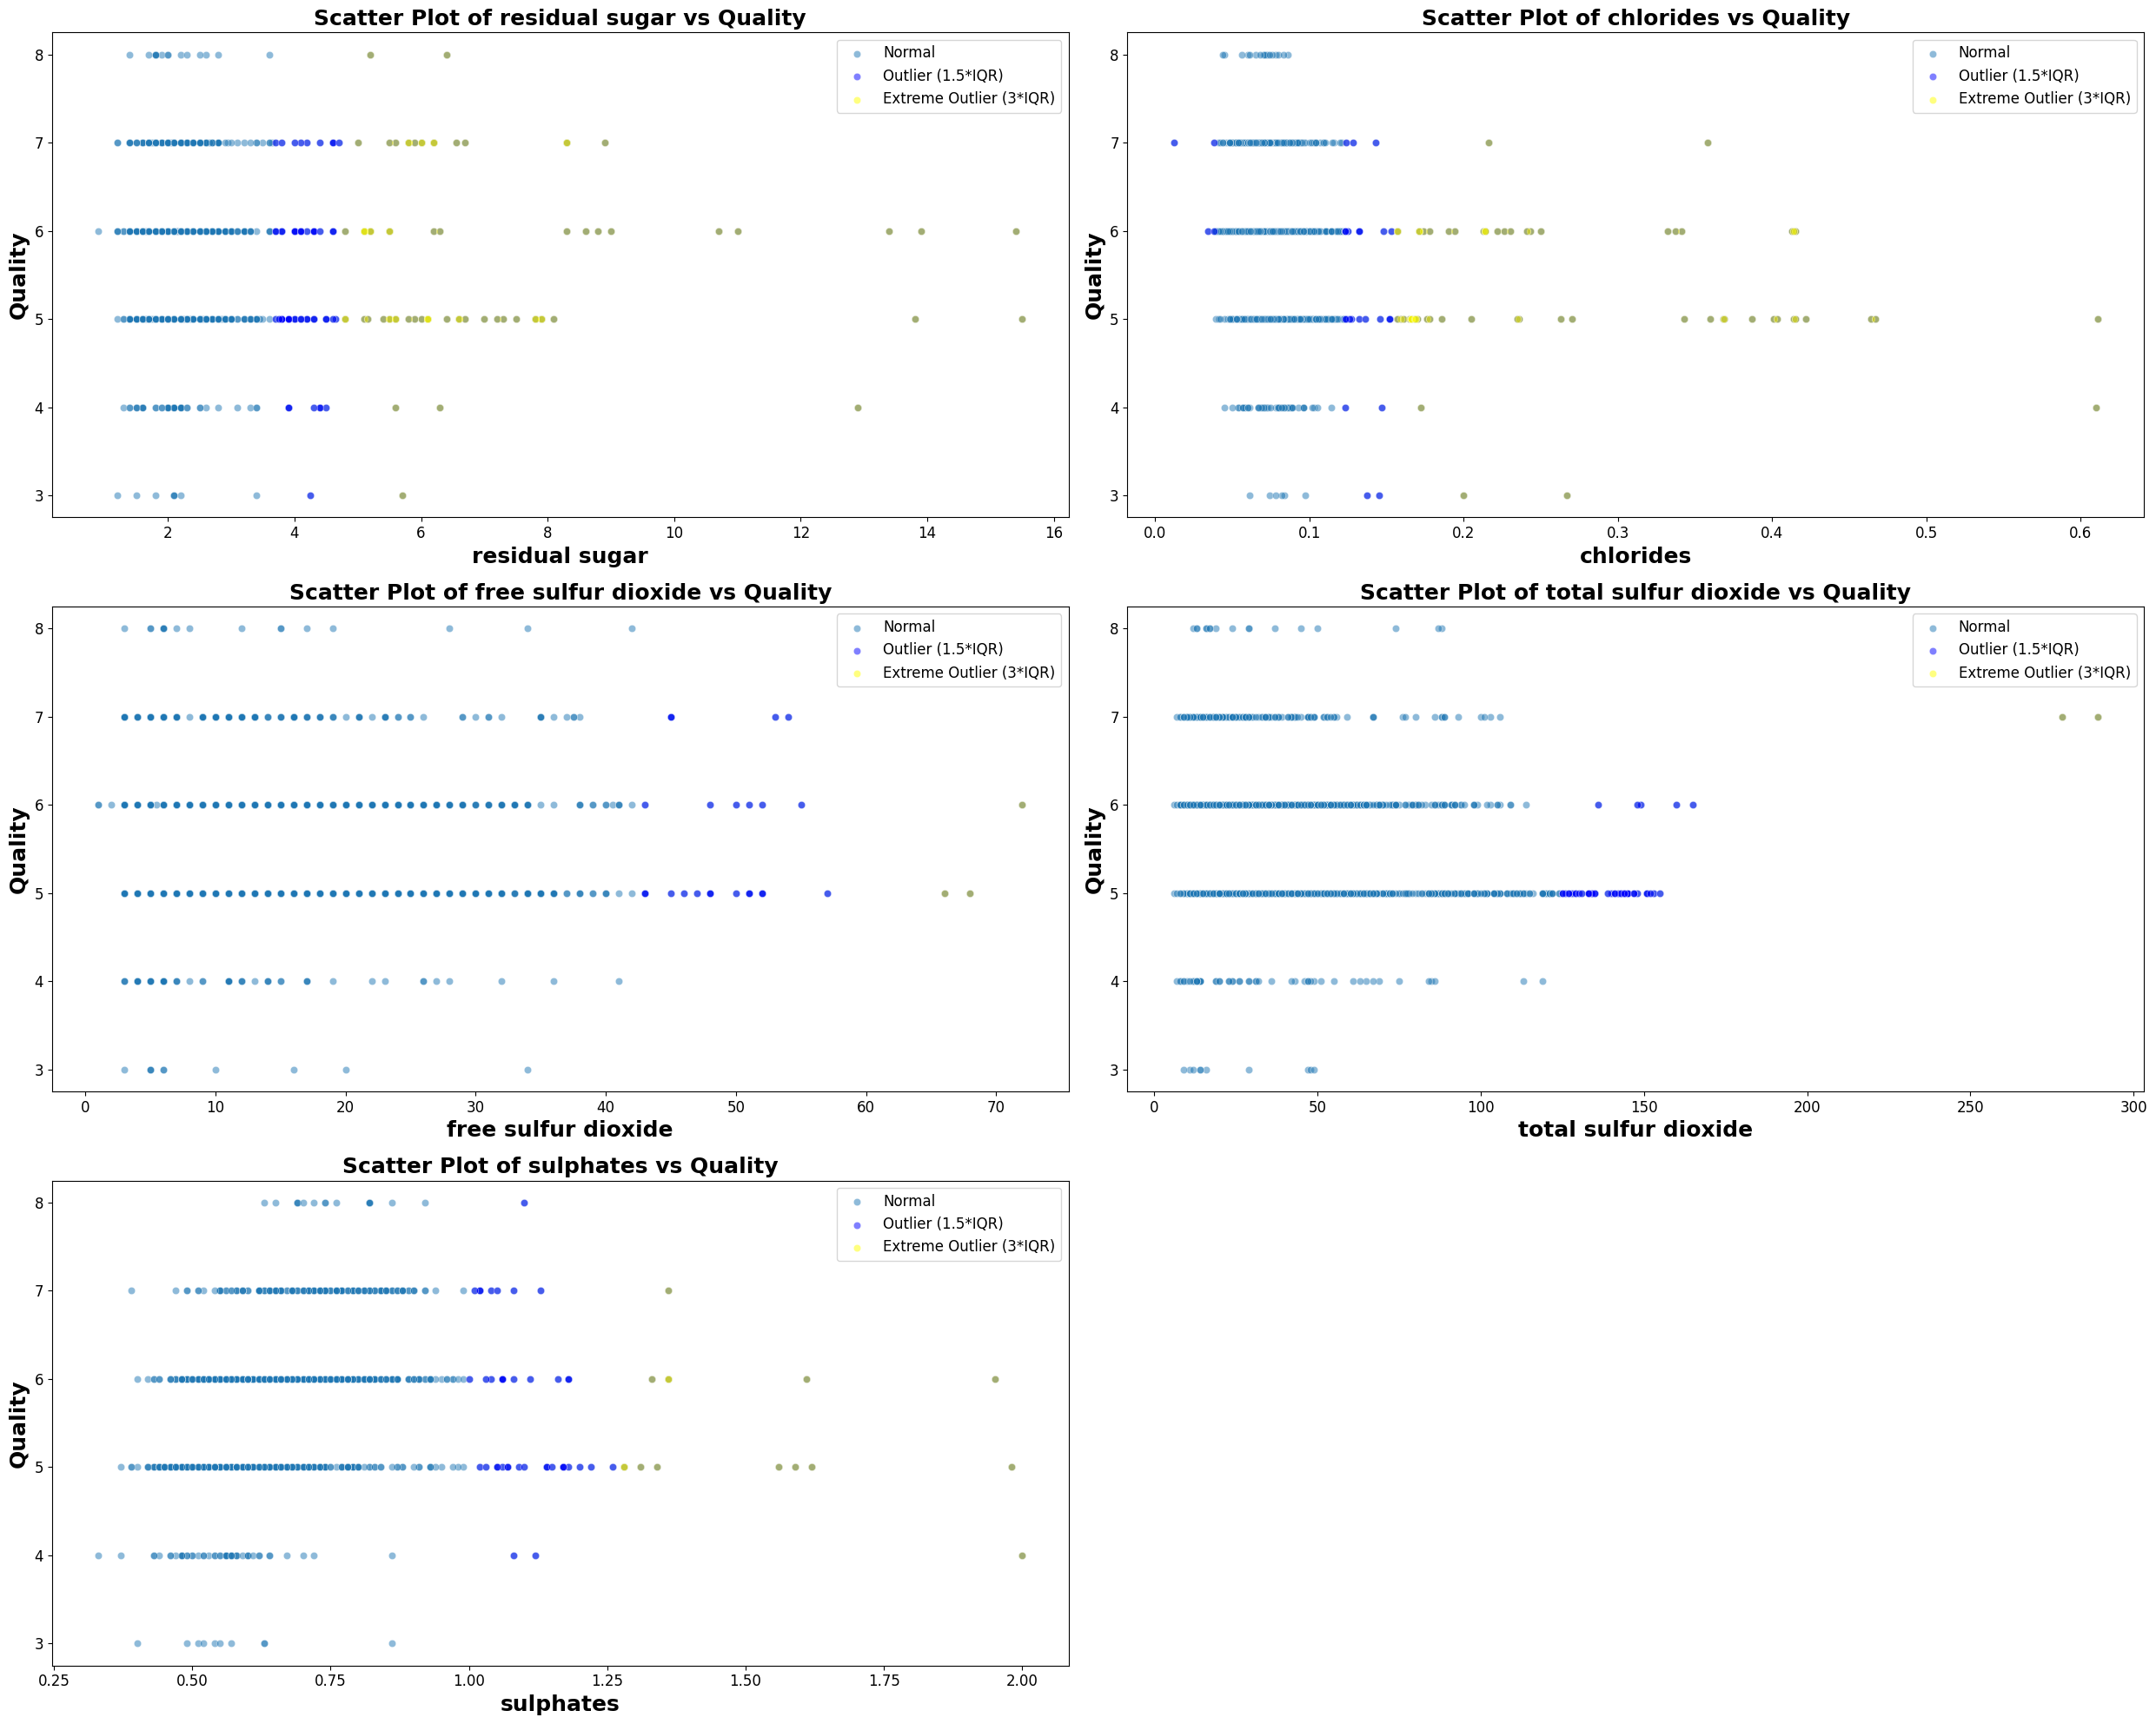

In [120]:
plt.figure(figsize=(25, 20))

for i, feature in enumerate(high_skewed_features, 1):
    ax = plt.subplot(3, 2, i)
    
    Q1 = wine_data[feature].quantile(0.25)
    Q3 = wine_data[feature].quantile(0.75)
    IQR = Q3 - Q1
    
    outliers_mask = (wine_data[feature] < (Q1 - 1.5 * IQR)) | (wine_data[feature] > (Q3 + 1.5 * IQR))
    extreme_outliers_mask = (wine_data[feature] < (Q1 - 3 * IQR)) | (wine_data[feature] > (Q3 + 3 * IQR))
    
    sns.scatterplot(x=wine_data[feature], y=wine_data['quality'], alpha=0.5, label='Normal', ax=ax)
    
    sns.scatterplot(x=wine_data[feature][outliers_mask], y=wine_data['quality'][outliers_mask], color='blue', alpha=0.5, label='Outlier (1.5*IQR)', ax=ax)
    
    sns.scatterplot(x=wine_data[feature][extreme_outliers_mask], y=wine_data['quality'][extreme_outliers_mask], color='yellow', alpha=0.5, label='Extreme Outlier (3*IQR)', ax=ax)
    
    plt.title(f'Scatter Plot of {feature} vs Quality', fontweight='bold', fontsize = 18)
    plt.xlabel(f'{feature}', fontweight='bold', fontsize = 18)
    plt.ylabel('Quality', fontweight='bold', fontsize = 18)
    plt.legend()

plt.tight_layout()
plt.show()

Outliers appear randomly distributed with respect to the quality feature. This indicates natural variation rather than systematic error, justifying keeping the data points.



#  Lets process the Data: 

- Outliers impact the correlation of linear relationship and as well as regression line. 

- Address skewness by applying transfromation to features with  extreme outliers and high skewness 

In [121]:
wine_df2 = wine_data.copy()
transformed_features = ['residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'sulphates']

for feature in transformed_features:
    wine_df2[feature] = np.sqrt(wine_df2[feature])

In [122]:
combined_outliers_df = pd.concat([
    outliers_count(wine_df2[transformed_features]).rename(columns=lambda x: f"{x}_transformed"),
    outliers_count(wine_data[transformed_features]).rename(columns=lambda x: f"{x}_original")
], axis=1)

display(combined_outliers_df)

Outliers_transformed  Extreme Outliers_transformed  \
residual sugar                         114                            58   
chlorides                               90                            49   
free sulfur dioxide                      4                             0   
total sulfur dioxide                     3                             0   
sulphates                               46                             7   

                      Skewness_transformed  Outliers_original  \
residual sugar                    2.923234                126   
chlorides                         3.667649                 87   
free sulfur dioxide               0.476858                 26   
total sulfur dioxide              0.641341                 45   
sulphates                         1.574817                 55   

                      Extreme Outliers_original  Skewness_original  
residual sugar                               70           4.548153  
chlorides                                    60           5.502487  
free sulfur dioxide                           3           1.226579  
total sulfur dioxide                          2           1.540368  
sulphates                                    15           2.406505

Despite the improvements, some features still exhibit skewness above the threshold of
1 .

These include:
- **Residual Sugar**
- **Free Sulfur Dioxide**
- **Total Sulfur Dioxide**
- **Sulphates**

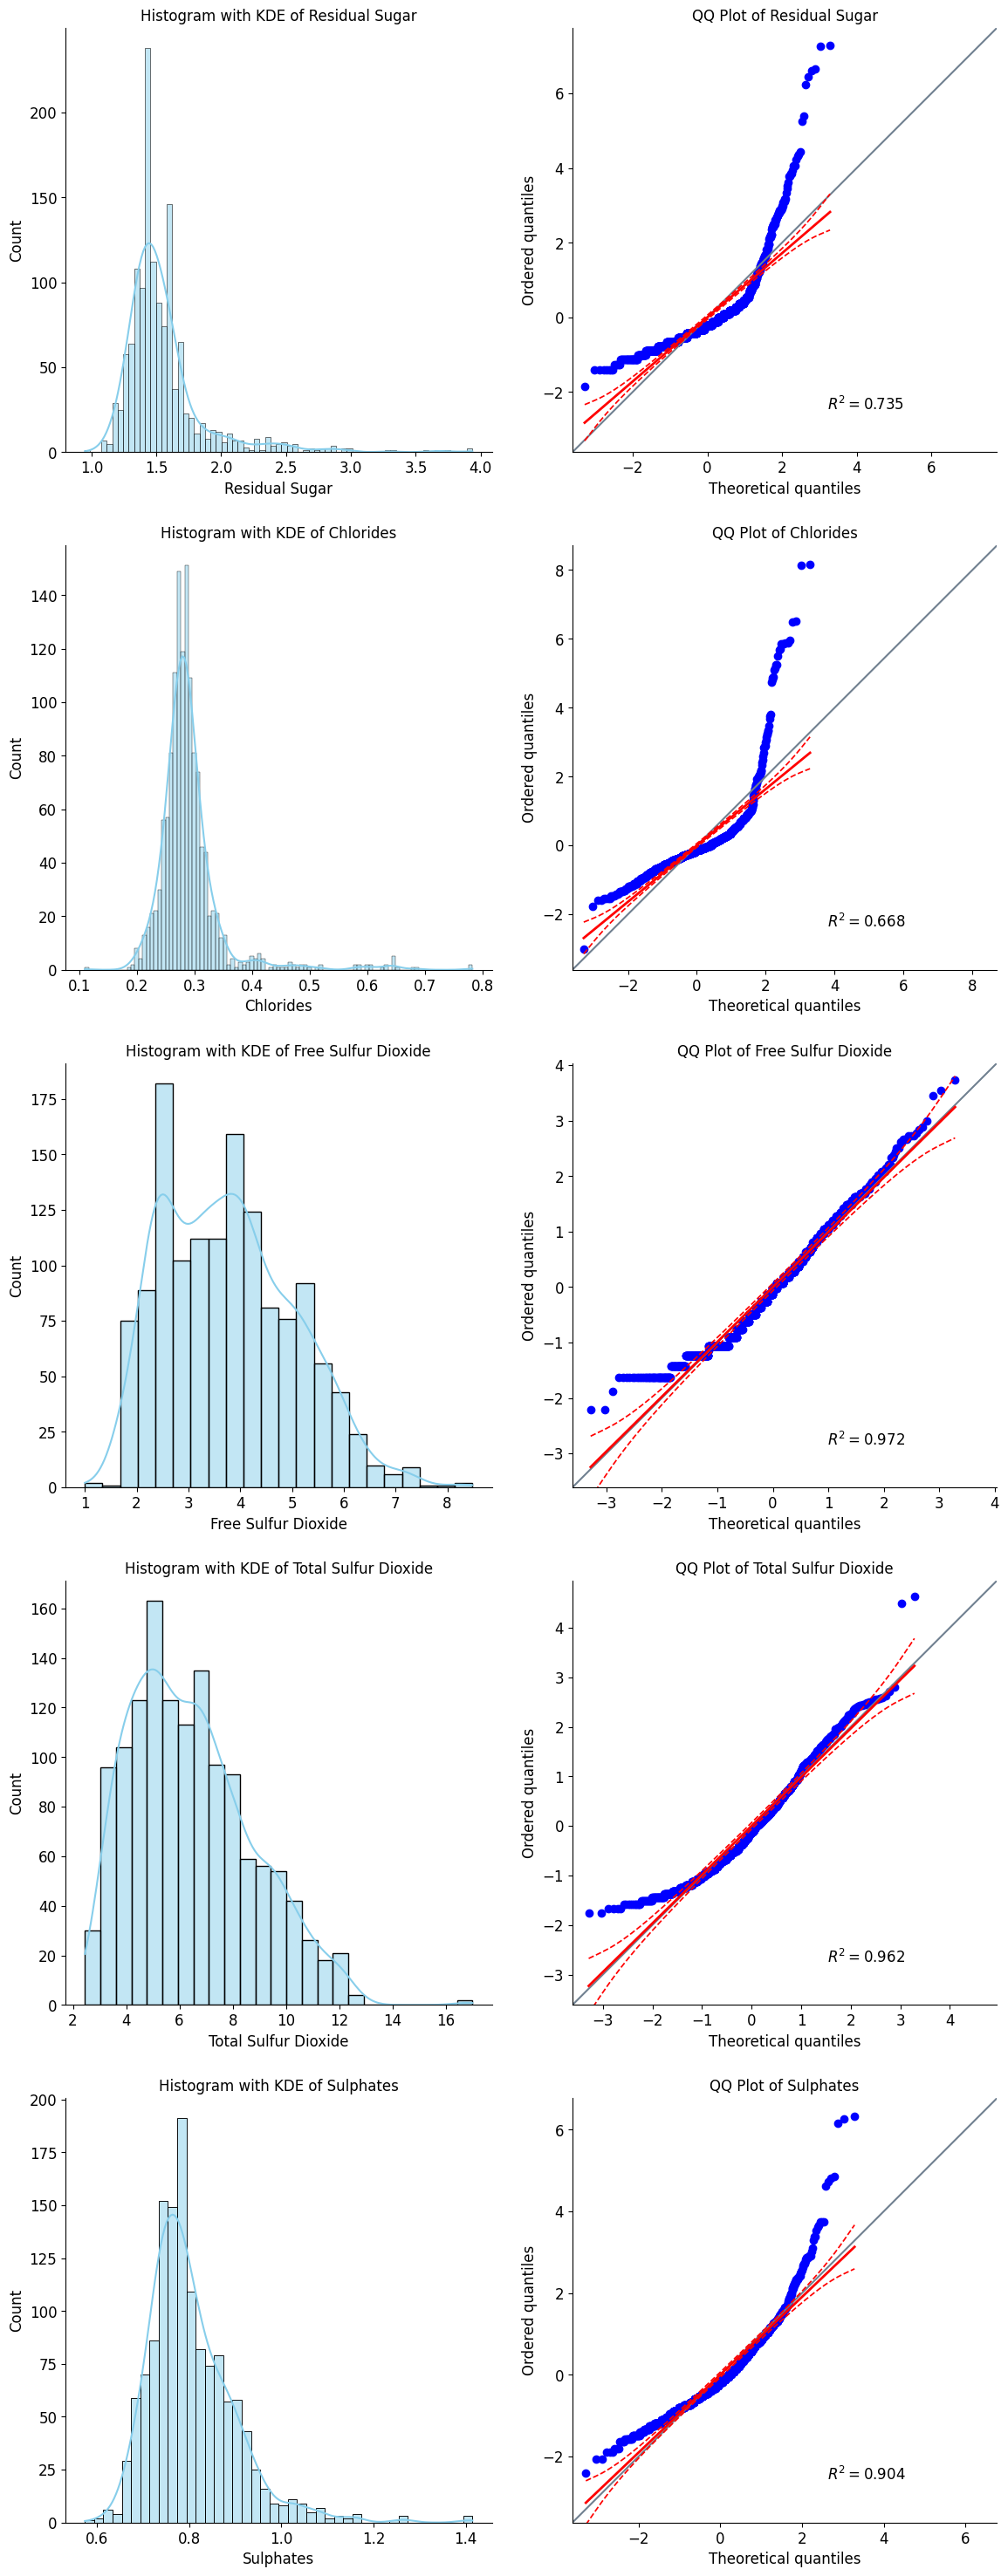

In [123]:
create_distributions_with_qqplot(wine_df2[transformed_features])

- The transfomration made some improvement, with regards to the skewness .
- **Still The features have outliers and skewness and are not normally distributed.**

- Based on qq plot analysis of both before and after transformation, we would assume that most of the features in our dataset does **not** meets the normailty assumptions. 


---

### Looking at the correlation bewteen features and in particular to wine quality feature

# Bivariate Analysis

In [124]:
features = wine_df2.drop(['quality'], axis = 1)
quality = wine_df2['quality']

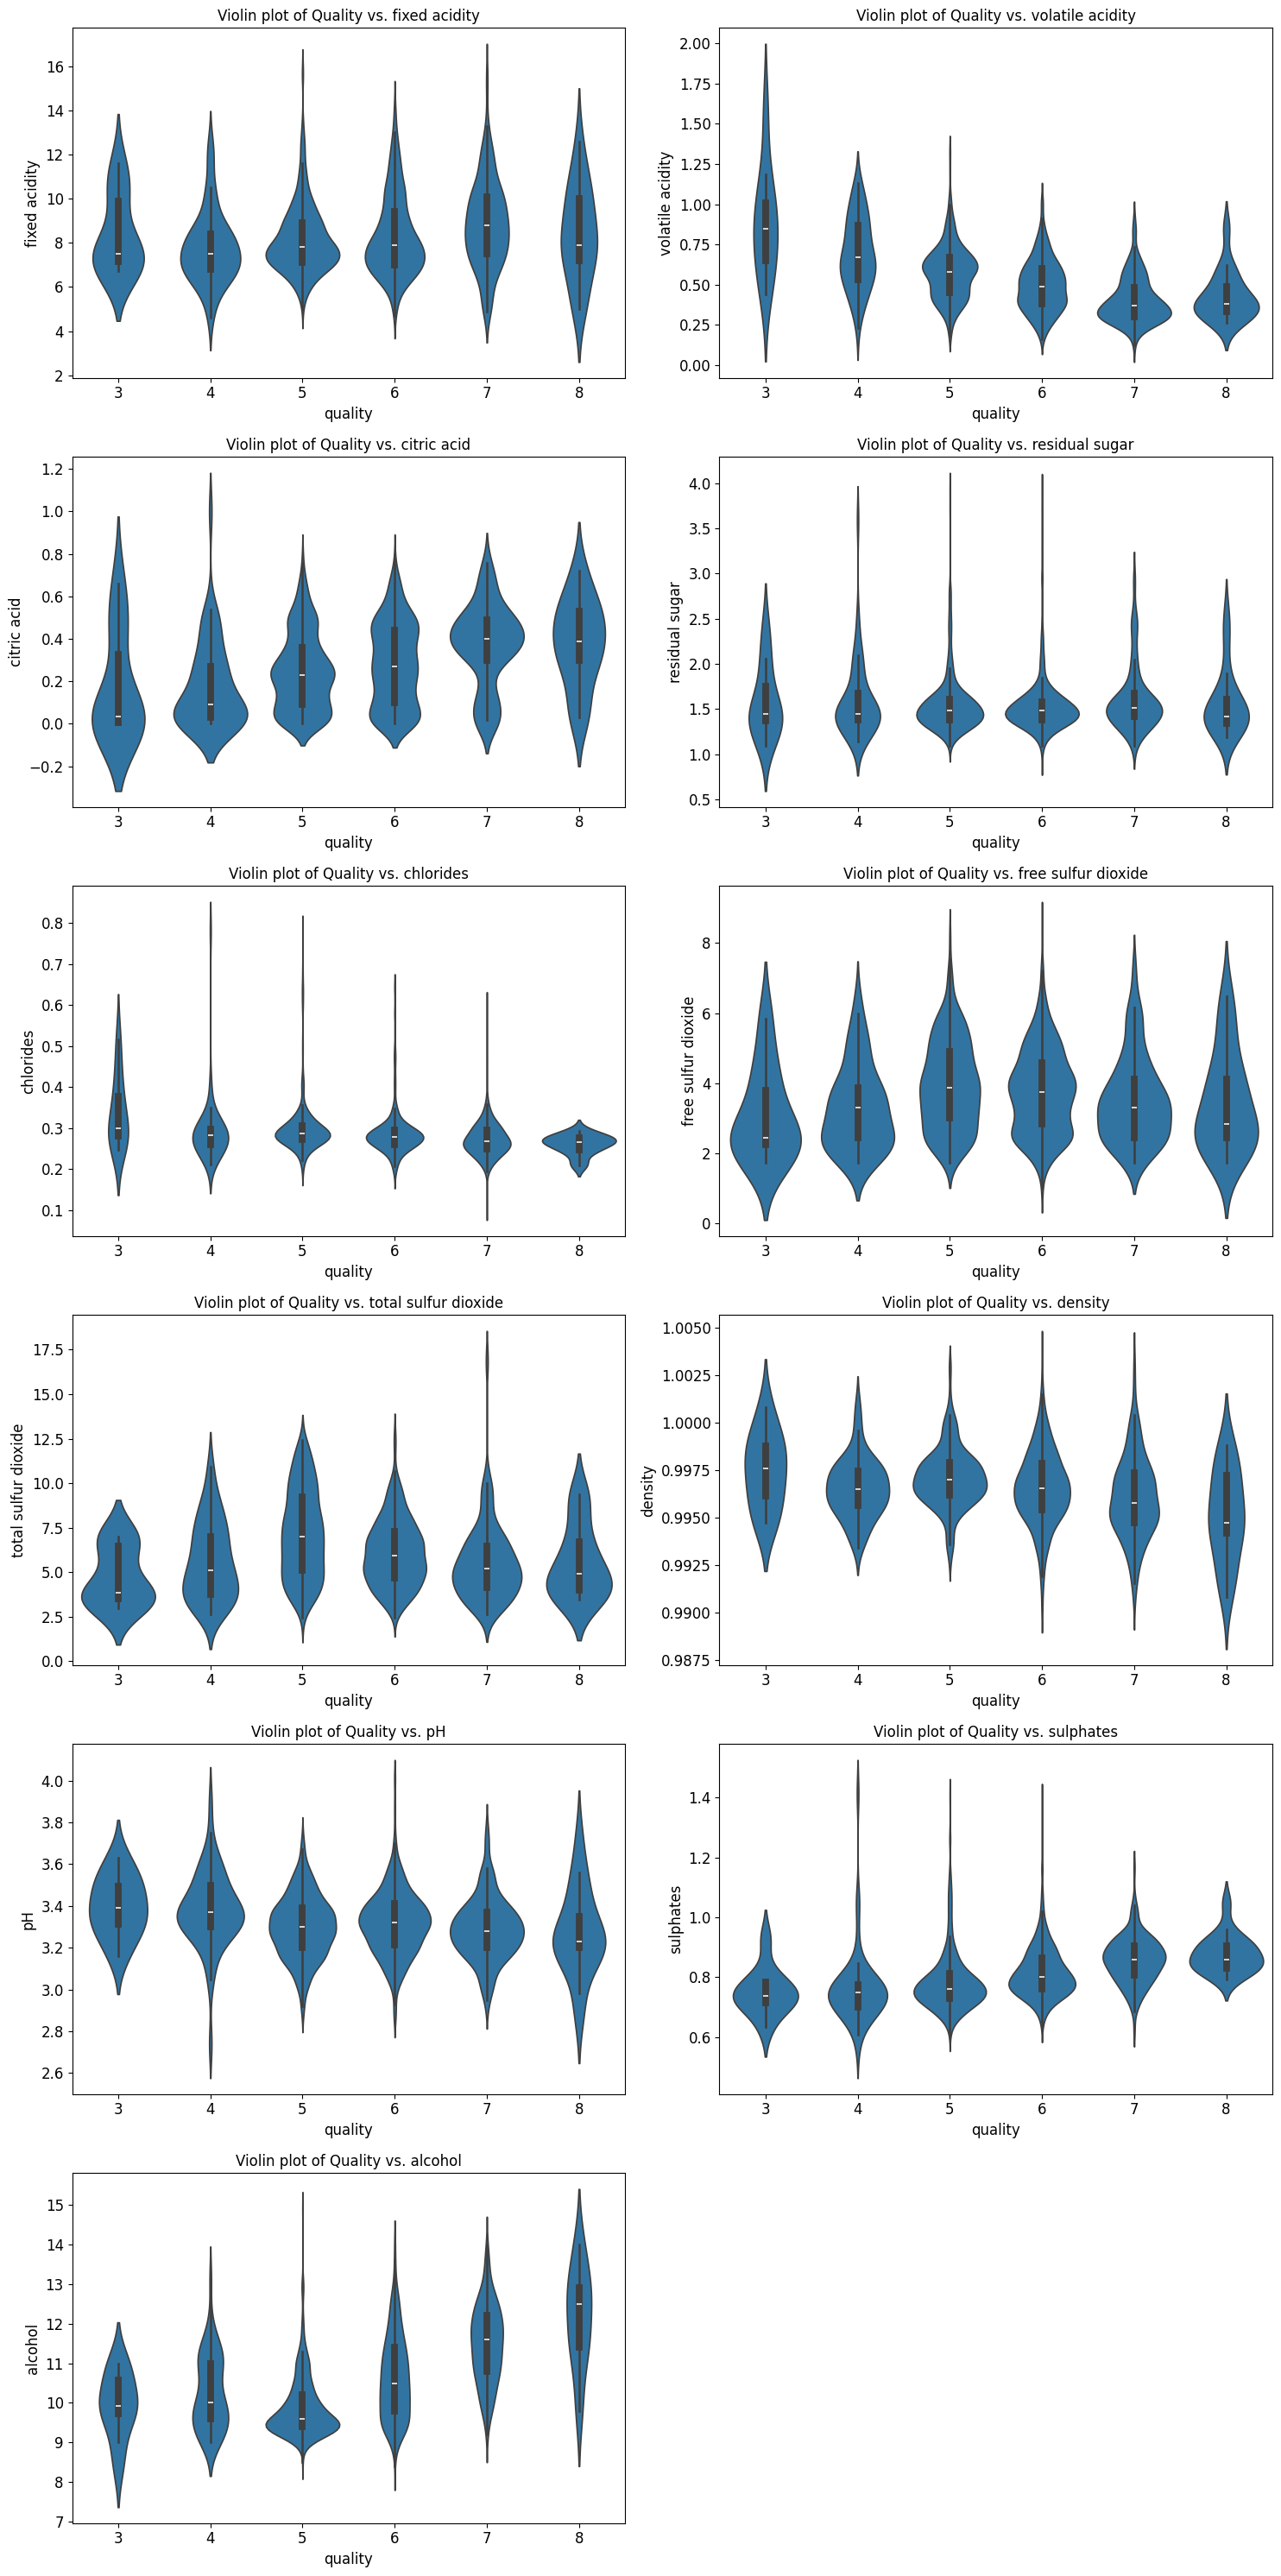

In [125]:
num_features = len(features.columns) 
num_rows = num_features // 2 if num_features % 2 == 0 else (num_features // 2) + 1

fig, axs = plt.subplots(num_rows, 2, figsize=(15, num_rows*5))  
axs = axs.ravel()

for i, feature in enumerate(features):
    sns.violinplot(x=quality, y=wine_df2[feature], ax=axs[i])
    axs[i].set_title(f'Violin plot of Quality vs. {feature}')

if num_features % 2 != 0:
    axs[-1].axis('off')

plt.tight_layout()
plt.show()

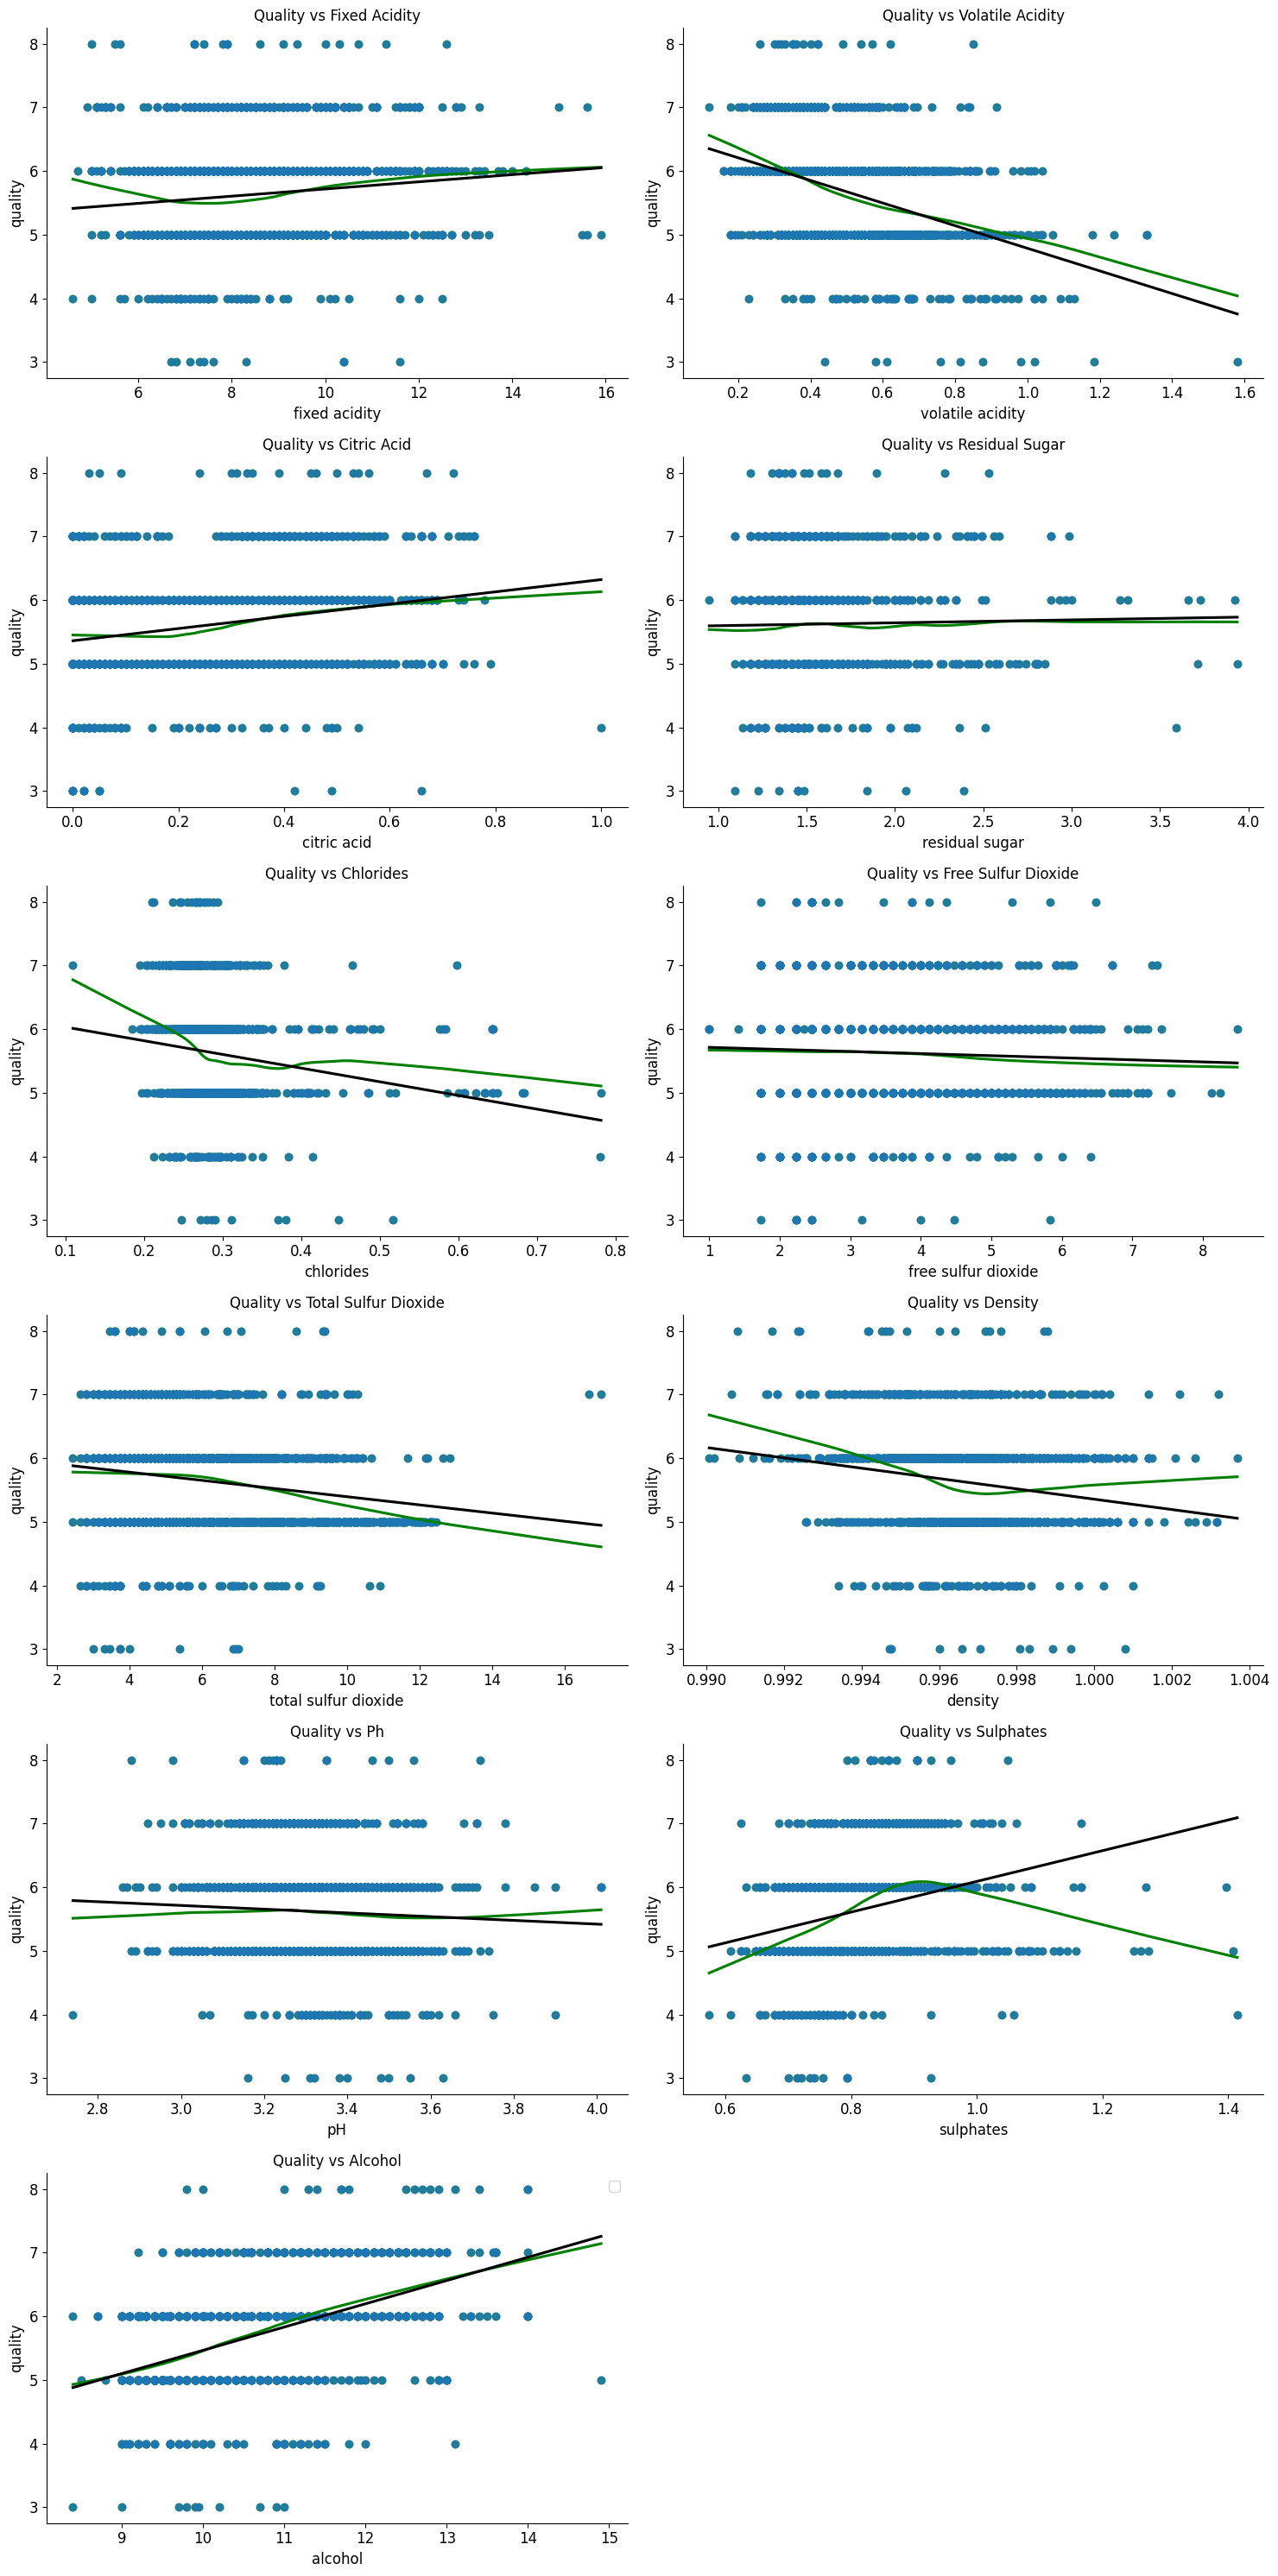

In [126]:
features = [col for col in wine_df2.columns if col != 'quality']

num_features = len(features)
num_cols = 2
num_rows = (num_features + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5))

axes = axes.flatten()

for i, feature in enumerate(features):
    sns.regplot(x=feature, y='quality', data=wine_df2, lowess=True, ax=axes[i], color = "green")
    sns.regplot(x=feature, y='quality', data=wine_df2, line_kws= {"color" : "black"}, ci = None ,ax=axes[i])

    axes[i].set_title(f'Quality vs {feature.title()}')
       
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

sns.despine()
plt.legend()
plt.tight_layout()
plt.show()

### Wine Quality Insights

**Critical Quality Indicators:**
- **Volatile Acidity**: Lower amounts in higher quality wines , has steep negative slope   
- **Chlorides**: Lower levels associated with better quality, has negative slope
- **Citric Acid**: Higher amounts in higher quality wines, has positive slope
- **Sulphates**: Elevated levels in higher quality wines, has positive slope
- **Alcohol**: Strong correlation with quality; higher in premium wines, has postive slope

**Less Impactful:**
- **Fixed Acidity & Density**: Show variations but have a murkier connection with quality.

**Minor Impact:**
- **Residual Sugar, Free & Total Sulfur Dioxide, pH**: No clear link to quality discerned.


              Potential non-linear relationships exist between features (e.g., sulfates, residual sugar).
            Later We'll use partial residual plots to isolate the effects of individual features while controlling other variables.

# Correlation Ánalysis

#### Looking at Spearman corerlation of feature w quality 

In [127]:
spearman_corr = wine_df2.corr(method='spearman')

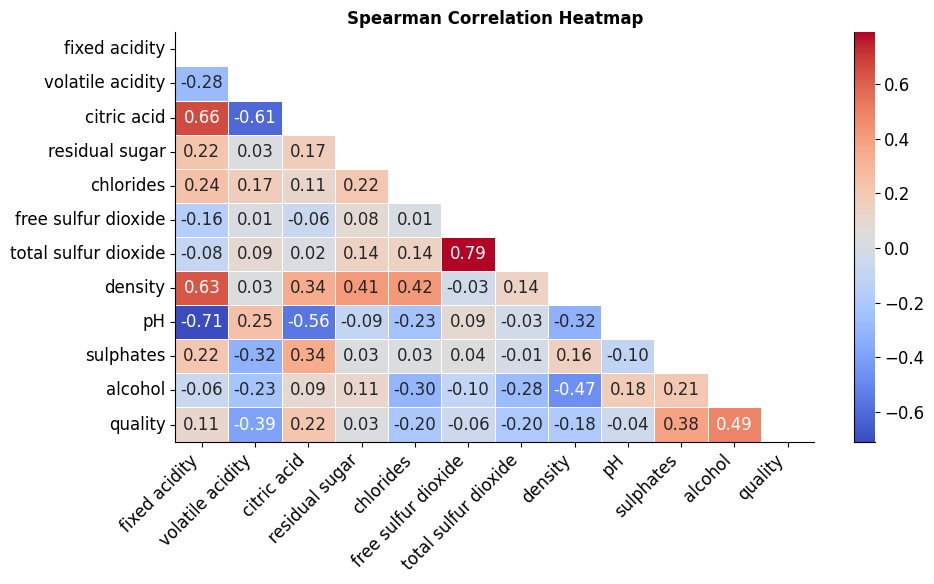

In [128]:
plot_heatmap(spearman_corr, 'Spearman Correlation Heatmap', 'spearman')
plt.show()

### Consolidated Insights from Spearman Correlation Heatmap

- **Volatile Acidity & Quality**: The negative Spearman correlation (`-0.39`) corroborates previous findings that volatile acidity is inversely related to wine quality.
- **Citric Acid & Quality**: The absence of a direct strong correlation in the heatmap suggests citric acid's relationship with quality may be influenced by other variables.
- **Alcohol & Quality**: The positive Spearman correlation (`0.49`) reinforces the assertion that alcohol content is significantly associated with higher wine quality.
- **Sulphates & Quality**: A positive correlation (`0.38`) is consistent with previous observations linking sulphates to better quality wines.
- **Total Sulfur Dioxide & Free Sulfur Dioxide**: Their strong correlation (`0.79`) is notable but not directly tied to quality in our earlier analysis.
    - Features with strong correlation between themselve would be a concern due to multicolinearity when building regression models.




##  Partial Correlation 
- For deeper insight into direct relationships between features by controlling for the influence of other variables.


In [129]:
target = 'quality'

features = wine_df2.columns.drop(target)
partial_corr_matrix = pd.DataFrame(index=features, columns=features)

for feature in features:
    for control in features:
        if feature != control:
            covariates = [col for col in features if col != feature and col != control]
            partial_corr = pg.partial_corr(data=wine_df2, x=feature, y=target, covar=covariates, method='spearman')
            
            if not partial_corr.empty:
                try:
                    partial_corr_matrix.at[feature, control] = partial_corr.at['spearman', 'r']
                except KeyError as e:
                    print(f"KeyError accessing partial_corr at feature {feature} and control {control}: {e}")
                    partial_corr_matrix.at[feature, control] = None
            else:
                print(f"Partial correlation result is empty for feature {feature} and control {control}")
                partial_corr_matrix.at[feature, control] = None
        else:
            partial_corr_matrix.at[feature, control] = 1.0  

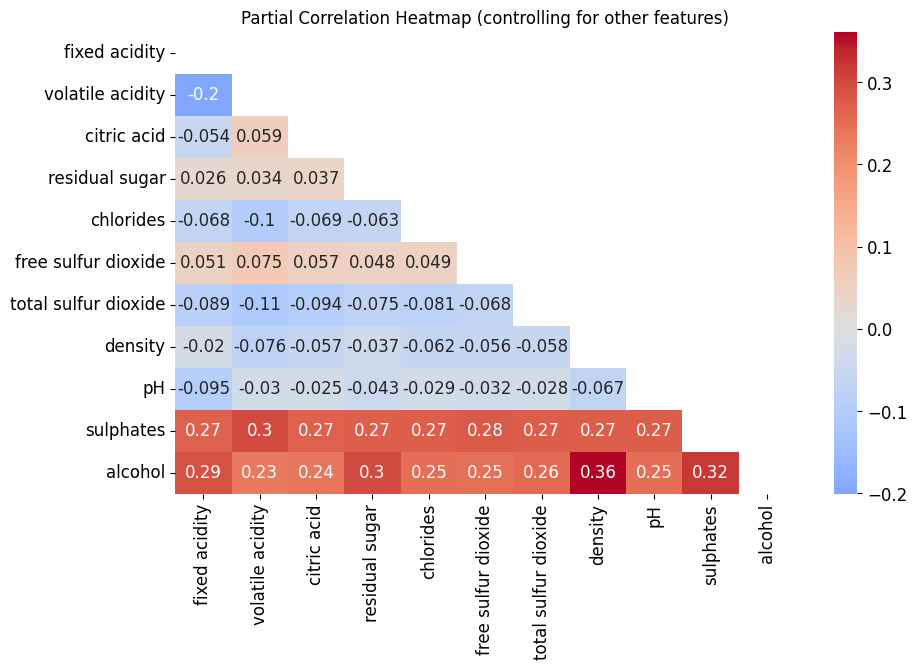

In [130]:
partial_corr_matrix = partial_corr_matrix.astype(float)

mask = np.triu(np.ones_like(partial_corr_matrix, dtype=bool))

sns.heatmap(partial_corr_matrix, annot=True, cmap='coolwarm', center=0, mask=mask)

plt.title('Partial Correlation Heatmap (controlling for other features)')
plt.show()

In [131]:
partial_corr_values = []
p_values = []

for feature in features:
    covariates = [col for col in features if col != feature]
    partial_corr = pg.partial_corr(data=wine_df2, x=feature, y=target, covar=covariates, method='spearman')
    
    if not partial_corr.empty:
        partial_corr_values.append(partial_corr.at['spearman', 'r'])
        p_values.append(partial_corr.at['spearman', 'p-val'])
    else:
        partial_corr_values.append(None)
        p_values.append(None)

partial_corr_df = pd.DataFrame({
    'Feature': features,
    'Partial Correlation with Quality': partial_corr_values,
    'p-value': p_values
})

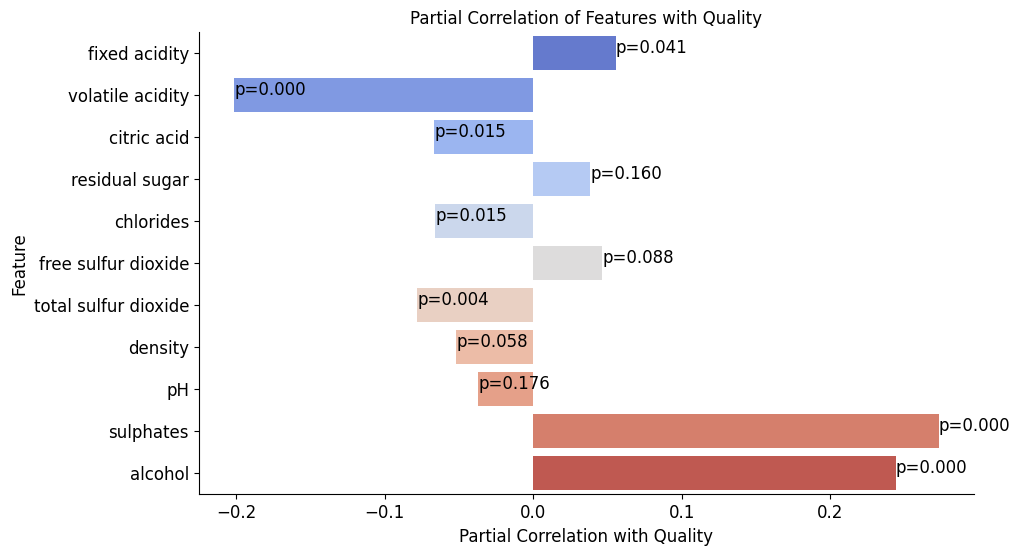

In [132]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Partial Correlation with Quality', y='Feature', data=partial_corr_df, palette='coolwarm')

for index, row in partial_corr_df.iterrows():
    plt.text(row['Partial Correlation with Quality'], index, f"p={row['p-value']:.3f}", color='black', ha="left")

sns.despine()
plt.title('Partial Correlation of Features with Quality')
plt.show()


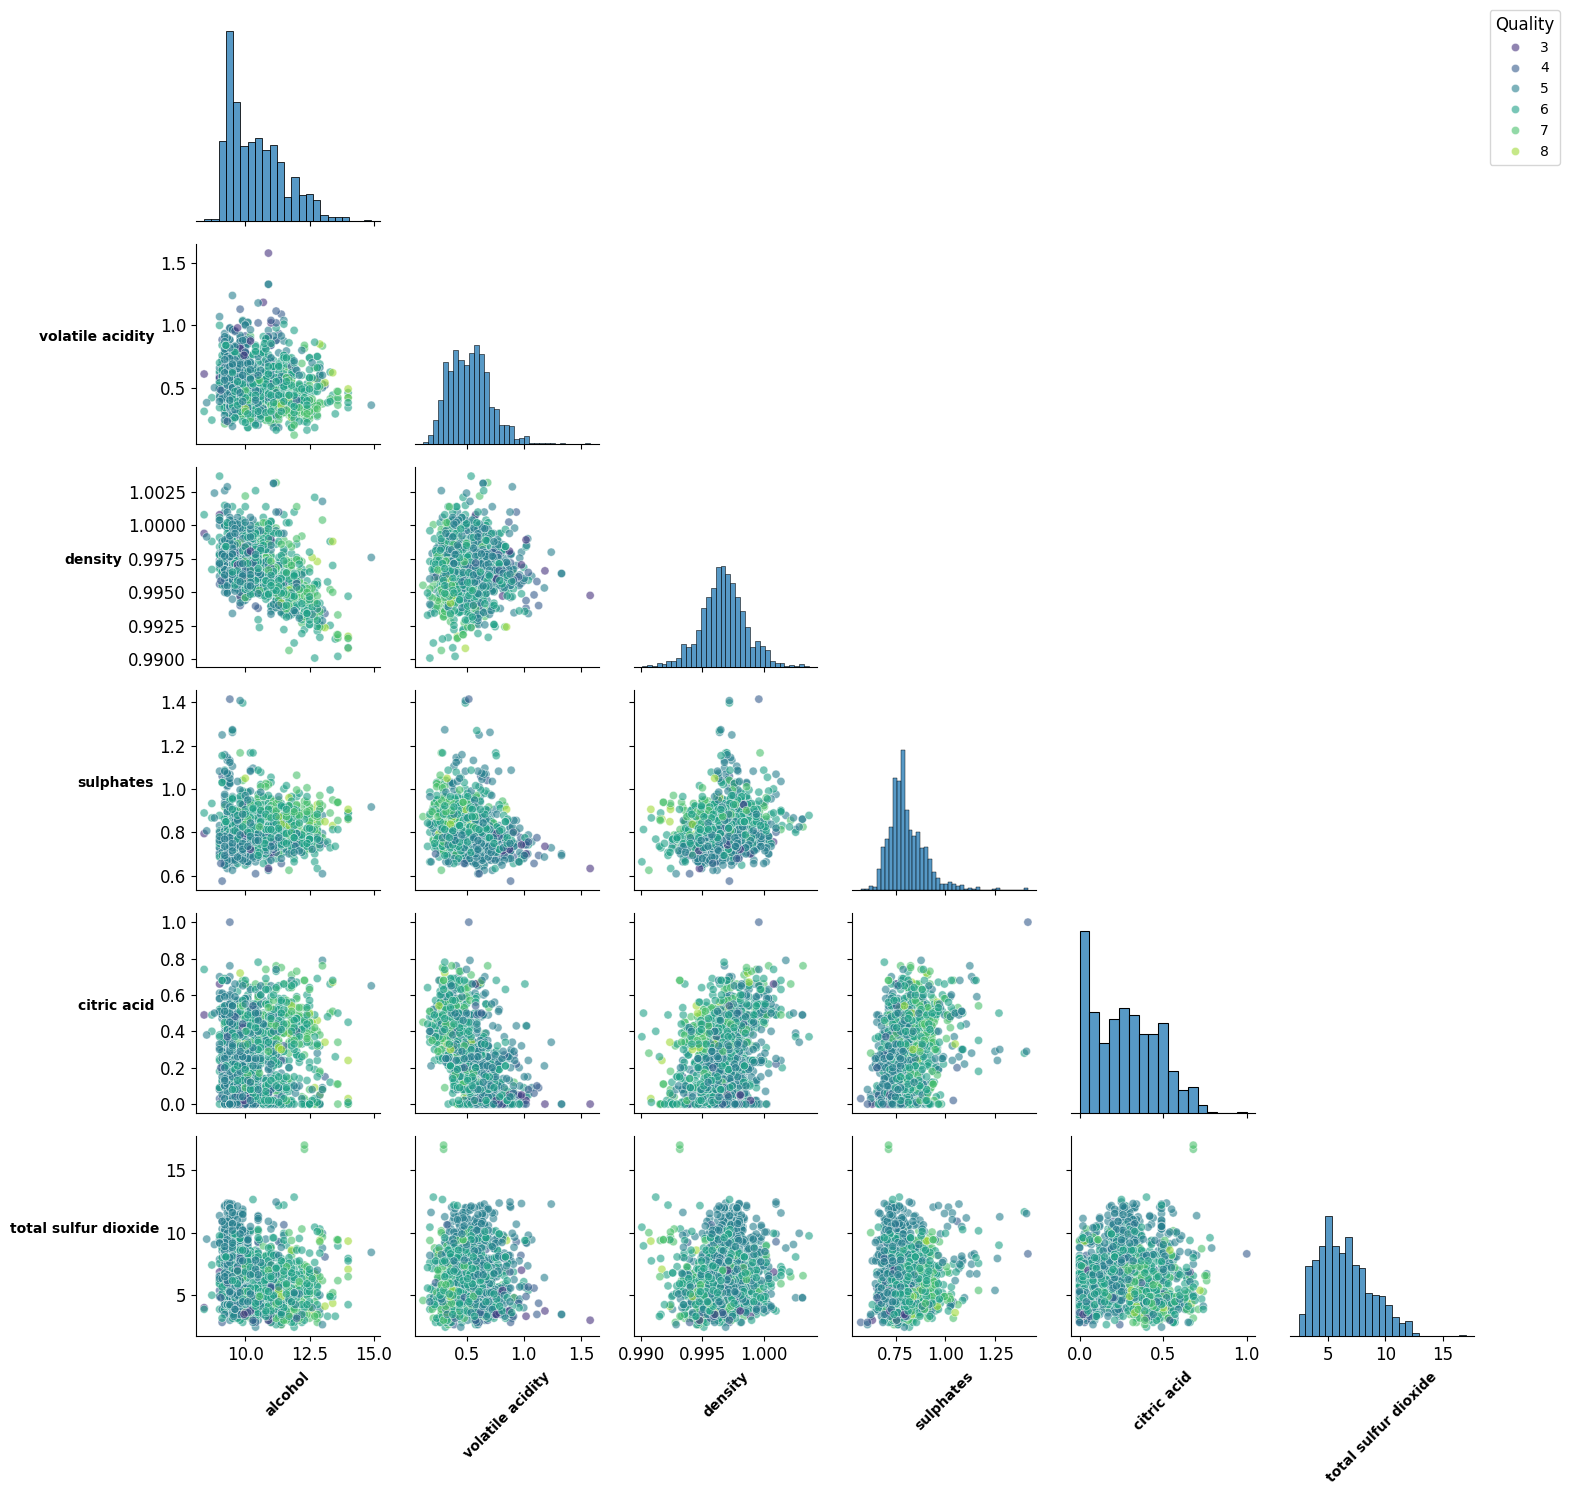

In [133]:

selected_features = ['alcohol', 'volatile acidity', 'density','sulphates','citric acid','total sulfur dioxide']
quality = wine_df2['quality']

palette = sns.color_palette("viridis", as_cmap=False, n_colors=quality.nunique())

g = sns.PairGrid(wine_df2, vars=selected_features, hue='quality', palette=palette , corner = True)

g = g.map_lower(sns.scatterplot, alpha=0.6, edgecolor='w', s=35)
g.map_diag(sns.histplot, kde=False, hue = None)

for ax in g.axes.flatten():
    if ax:
        ax.set_xlabel(ax.get_xlabel(), rotation=45, fontweight="bold", fontsize=10)
        ax.set_ylabel(ax.get_ylabel(), rotation=0, horizontalalignment='right', fontweight="bold", fontsize=10)

handles = g._legend_data.values()
labels = g._legend_data.keys()
g.fig.legend(handles=handles, labels=labels, title='Quality', loc='upper right', bbox_to_anchor=(1.05, 1), fontsize=10)

plt.tight_layout()
plt.show()

###  Insights from  Scatterplot Matrix

- **Alcohol & Volatile Acidity**: Suggests a mitigating effect of higher alcohol on the negative impact of volatile acidity on quality.
- **Density Interactions**: Indicates a nuanced relationship with alcohol and citric acid, not previously evident.
- **Citric Acid & Alcohol**: Shows a potential positive interaction affecting quality, which was not directly observable in the heatmap.
- **Sulphates & Alcohol**: Suggests that higher sulphates in conjunction with higher alcohol might correlate with better quality, an interaction not highlighted before.


Scatter plots confirm the correlation results: volatile acidity negatively correlates with wine quality, while alcohol shows a positive correlation. Interactions with other features reveal no unexpected trends

---

# Statistical Analysis


Use t-tests and effect sizes to analyze statistical differences in characteristics between high-quality and regular wines

Analyzing interaction effects between alcohol content and volatile acidity (which exhibited the highest Cohen's d values) to assess their combined influence on wine quality.


In [134]:
def perform_mann_whitney_test(feature):
    high_quality_wines = wine_df2[wine_df2['quality'].isin([7, 8])]
    reg_wines = wine_df2[wine_df2['quality'].isin([3, 4, 5, 6])]
    
    high_quality_values = high_quality_wines[feature].values
    reg_values = reg_wines[feature].values
    
    u_stat, p_value = stats.mannwhitneyu(high_quality_values, reg_values, alternative='two-sided')
    
    n1 = len(high_quality_values)
    n2 = len(reg_values)
    rank_biserial = (2 * u_stat) / (n1 * n2) - 1

    return {
        'feature': feature,
        'u-stat': round(u_stat, 3),
        'p-value': round(p_value, 5),
        'rank_biserial': round(rank_biserial, 3),
        'null_hypothesis': "Reject Null Hypothesis" if p_value < 0.05 else "Fail to Reject Null Hypothesis"
    }

results = [perform_mann_whitney_test(feature) for feature in features]
mann_whitney_results = pd.DataFrame(results)

mann_whitney_results


feature    u-stat  p-value  rank_biserial  \
0          fixed acidity  130755.5  0.00000          0.210   
1       volatile acidity   55030.5  0.00000         -0.491   
2            citric acid  144860.0  0.00000          0.340   
3         residual sugar  117627.5  0.05382          0.088   
4              chlorides   78361.0  0.00000         -0.275   
5    free sulfur dioxide   91720.0  0.00093         -0.152   
6   total sulfur dioxide   76678.5  0.00000         -0.291   
7                density   79417.0  0.00000         -0.265   
8                     pH   96480.0  0.01888         -0.107   
9              sulphates  160757.5  0.00000          0.487   
10               alcohol  178255.0  0.00000          0.649   

                   null_hypothesis  
0           Reject Null Hypothesis  
1           Reject Null Hypothesis  
2           Reject Null Hypothesis  
3   Fail to Reject Null Hypothesis  
4           Reject Null Hypothesis  
5           Reject Null Hypothesis  
6           Reject Null Hypothesis  
7           Reject Null Hypothesis  
8           Reject Null Hypothesis  
9           Reject Null Hypothesis  
10          Reject Null Hypothesis

### Insights

1. **Significant Differences Across Quality Levels**:
   - Most features show significant differences between high-quality (7 and 8) and regular quality wines (3 to 6) with p-values < 0.05.
   - **Exception**: Residual sugar (p-value = 0.05382) is not statistically significant.

2. **Important Features for High Quality**:
   - **Alcohol**: Highest rank-biserial correlation (0.649), indicating that high-quality wines tend to have significantly higher alcohol content.
   - **Sulphates**: Significant positive effect (0.487), indicating higher sulphate levels in high-quality wines.
   - **Citric Acid** (0.340) and **Fixed Acidity** (0.210): Positive effects, with higher values associated with higher quality wines.

3. **Negative Influences**:
   - **Volatile Acidity**: Strong negative effect (-0.491), indicating that high-quality wines tend to have lower volatile acidity.
   - **Total Sulfur Dioxide** (-0.291) and **Chlorides** (-0.275): Higher values are associated with lower quality wines.

**Rank-Biserial Correlation:** Measures the rank-based separation between two groups, providing an effect size for non-parametric data.


# Statistical Analysis of Alcohol Content in Relation to Wine Quality









**Questions:**
 - Alcohol Content's Relation to Quality: We will calculate the 95% confidence interval for the average alcohol content in high-quality wines. This will give us an estimate of where the true mean alcohol percentage is likely to fall for wines rated 7 or higher.

- Visuallizing Comparison Means: We're interested in whether there is a statistically significant difference in alcohol content between high-quality wines and those of lower quality. This could provide insight into whether alcohol content is a good predictor of wine quality .

### **What is the average alcohol percentage in wines rated as 'high quality' (quality rating 7 or above), and what is the 95% confidence interval for this estimate?**

Assumption Checks:

- Before we proceed with hypothesis testing, we will conduct tests for normality and equal variances to ensure that the assumptions underlying our statistical tests are met.



In [135]:
high_quality_wines = wine_df2[wine_df2['quality'] >= 7]

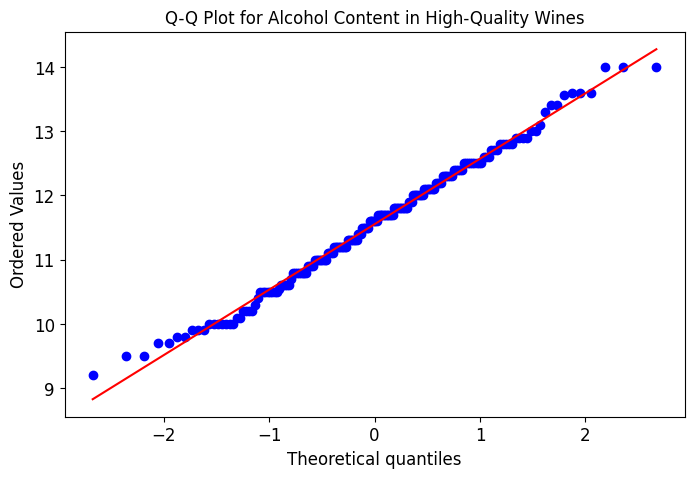

In [136]:
plt.figure(figsize=(8, 5))
stats.probplot(high_quality_wines['alcohol'], dist="norm", plot=plt)
plt.title('Q-Q Plot for Alcohol Content in High-Quality Wines')
plt.show()

In [137]:
shapiro_test_alcohol = stats.shapiro(high_quality_wines['alcohol'])
t, p = shapiro_test_alcohol
print(p)

0.29005487076545533


- P value is greate than 0.05, we fail to reject the null hypotheis, 
Data is normally distributed .

In [138]:
mean_alcohol = high_quality_wines['alcohol'].mean()
sem_alcohol = stats.sem(high_quality_wines['alcohol'])
ci_alcohol = stats.t.interval(0.95, len(high_quality_wines['alcohol']) - 1,
                              loc=mean_alcohol, scale=sem_alcohol)

            - Standard Error of the Mean (SEM): standard_deviation / sqrt(sample_size)

            - Confidence Interval: Use the t-distribution to find the critical value for a 95% confidence level. The confidence interval can then be calculated as mean ± (critical_value * SEM).

In [139]:
ci_low, ci_high = ci_alcohol

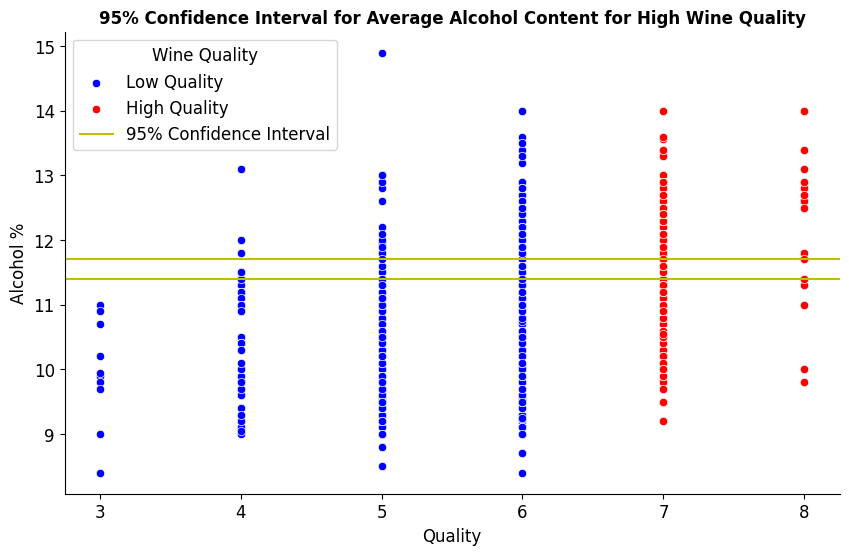

In [140]:
sns.scatterplot(x='quality', 
                y='alcohol',
                data= wine_df2,
                label='Low Quality',
                color='blue')

sns.scatterplot(x='quality', 
                y='alcohol',
                data= high_quality_wines,
                label='High Quality',
                color='red')
plt.ylabel("Alcohol %")
plt.xlabel("Quality")
plt.axhline(ci_low, color='y', label='95% Confidence Interval')
plt.axhline(ci_high, color='y')
plt.title("95% Confidence Interval for Average Alcohol Content for High Wine Quality", fontweight="bold")
plt.legend(title="Wine Quality")
sns.despine()

In [141]:
print(f'The average percent of Alcohol in high wine quality is in the interval {ci_alcohol}[0], {ci_alcohol}[1]')

The average percent of Alcohol in high wine quality is in the interval (np.float64(11.405570069045893), np.float64(11.700045872983086))[0], (np.float64(11.405570069045893), np.float64(11.700045872983086))[1]


**We are 95% confident that the true mean alcohol content for high-quality wines (rated 7 or higher) lies between 11.41% and 11.70%.**


----

Looking more comprehensievely at the staitstical significance of wine quality and alochol.

### **Is there a statistically significant difference in the mean alcohol percentage between high-quality and lower-quality wines?**

- **Null Hypothesis (H₀):** There is no significant difference in the mean alcohol percentage between high-quality and lower-quality wines.
  
          - H₀: μ_high-quality = μ_lower-quality

- **Alternative Hypothesis (H₁):** There is a significant difference in the mean alcohol percentage between high-quality and lower-quality wines.
  
  -        H₁: μ_high-quality ≠ μ_lower-quality


In [142]:
high_quality_alcohol = wine_df2[wine_df2['quality'] >= 7]['alcohol']
lower_quality_alcohol = wine_df2[wine_df2['quality'] < 7]['alcohol']

shapiro_high_quality = stats.shapiro(high_quality_alcohol)
shapiro_lower_quality = stats.shapiro(lower_quality_alcohol)

print("Shapiro-Wilk Test Results:")
print("--------------------------")
print(f"High Quality Wines' Alcohol Percentage:\nStatistic: \n" 
      f"{shapiro_high_quality[0]}, P-value: {shapiro_high_quality[1]}")
print(f"\nLower Quality Wines' Alcohol Percentage:\nStatistic: \n"
      f"{shapiro_lower_quality[0]}, P-value: {shapiro_lower_quality[1]}")

Shapiro-Wilk Test Results:
--------------------------
High Quality Wines' Alcohol Percentage:
Statistic: 
0.9908251795568795, P-value: 0.29005487076545533

Lower Quality Wines' Alcohol Percentage:
Statistic: 
0.9121714664543021, P-value: 1.6523088561528068e-25


- For high quality wines, 
    - we **fail** to reject the null hypotehsis,
    - The alcohol percentage data is normally distrbuted. 
        

- However for the low quality wines, we **reject** the null hypothesos.
    - The data is **not** normally distributed

In [143]:
print(f'The sample size for both groups are:\n'
      f'{"-" * 36}\n'
      f'High Quality Wines: {high_quality_alcohol.shape[0]}\n'
      f'Lower Quality Wines: {lower_quality_alcohol.shape[0]}')


The sample size for both groups are:
------------------------------------
High Quality Wines: 184
Lower Quality Wines: 1175


Since the sample size is big enough, we can still choose t test due to CLT.

Checking for homoscadeascity :
- Null Hypothesis for Levene's Test: The variances of the two groups are equal.
- Alternative Hypothesis: The variances of the two groups are not equal.

In [144]:
print(f"Equality of Variance test Results\n"
      f'{"-" * 36}\n' 
      f"{stats.levene(high_quality_alcohol, lower_quality_alcohol)}")

Equality of Variance test Results
------------------------------------
LeveneResult(statistic=np.float64(1.0504759289171426), pvalue=np.float64(0.30558016804034915))


- Fail to reject the null hypothesis

**The two group have same variance**

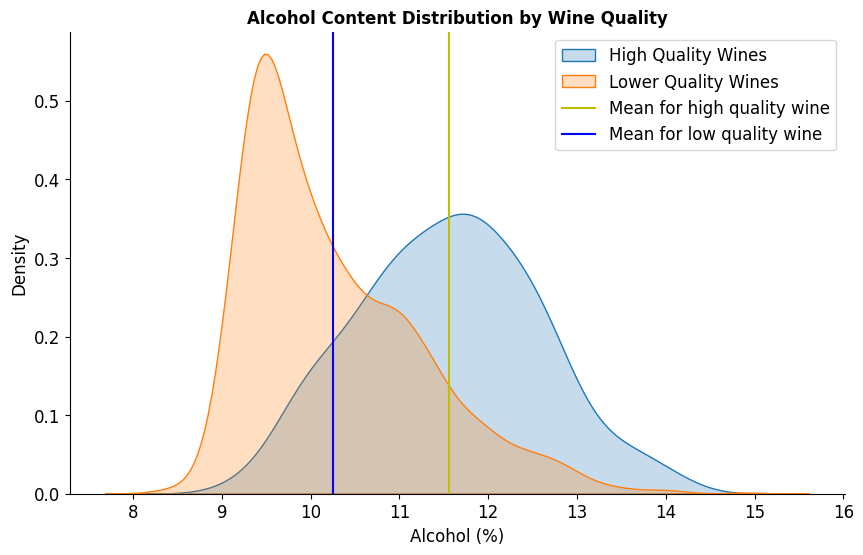

In [145]:
t_stat, p_value = stats.ttest_ind(high_quality_alcohol,
                                  lower_quality_alcohol,
                                  equal_var=True)

plt.figure(figsize=(10, 6))
sns.kdeplot(high_quality_alcohol, label='High Quality Wines', shade=True)
sns.kdeplot(lower_quality_alcohol, label='Lower Quality Wines', shade=True)
plt.title('Alcohol Content Distribution by Wine Quality', fontweight = "bold")
plt.axvline(high_quality_alcohol.mean(), label = "Mean for high quality wine", color = 'y')
plt.axvline(lower_quality_alcohol.mean(), label = "Mean for low quality wine", color ='b')
plt.xlabel('Alcohol (%)')
plt.ylabel('Density')
sns.despine()
plt.legend()
plt.show()

In [146]:

print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: 16.555555042278684, P-value: 3.2441514679446344e-56


**We reject the null hypothesis**

- The difference in average % of alcohol in high and low quality wine is significant 

Looking at the effect size

In [147]:
mean_high_quality = np.mean(high_quality_alcohol)
mean_lower_quality = np.mean(lower_quality_alcohol)

std_high_quality = np.std(high_quality_alcohol, ddof=1)
std_lower_quality = np.std(lower_quality_alcohol, ddof=1)

pooled_std = np.sqrt((std_high_quality**2 + std_lower_quality**2) / 2)

cohens_d = (mean_high_quality - mean_lower_quality) / pooled_std

print(f"Cohen's d: {cohens_d}")

Cohen's d: 1.2986346120866816


**A Cohen's d of 1.30 indicates a large, practically significant difference in alcohol content between high- and low-quality wines.**

    - Consumer Advice: Prefer wines with 11.4%-11.7% alcohol for high quality wine.

    - Winemaking Tip: Target the 11-11.5% alcohol range for potentially higher-quality wines, but balance this with other quality factors

---

# Predicting wine quality 
 ### Regression Analysis

- **Modeling**

In [148]:
X_train_base_model, X_test_base_model, y_train_base_model, y_test_base_model = preprocess_data(wine_df2, 'quality', stratify = True)
base_model, vif_base = fit_and_evaluate_model(X_train_base_model, y_train_base_model)

print("Model with All Features:")
print(base_model.summary())

Model with All Features:
                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.365
Model:                            OLS   Adj. R-squared:                  0.359
Method:                 Least Squares   F-statistic:                     56.22
Date:                Thu, 15 Aug 2024   Prob (F-statistic):           3.42e-98
Time:                        00:30:18   Log-Likelihood:                -1085.4
No. Observations:                1087   AIC:                             2195.
Df Residuals:                    1075   BIC:                             2255.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const  

Checking for multicolinarity 

In [149]:
print(vif_base.sort_values(by="VIF", ascending=False))

                 feature       VIF
1          fixed acidity  8.276808
8                density  7.129180
9                     pH  3.445130
11               alcohol  3.383589
3            citric acid  3.236196
7   total sulfur dioxide  2.817877
6    free sulfur dioxide  2.495362
4         residual sugar  1.788744
2       volatile acidity  1.782079
5              chlorides  1.445280
10             sulphates  1.401507
0                  const  1.000000


- Multicolineairty seems reasonable

In [150]:
y_pred_b = base_model.predict(X_test_base_model)
test_mse_b = mean_squared_error(y_test_base_model, y_pred_b)
test_r2_b = r2_score(y_test_base_model, y_pred_b)

In [151]:
print(test_mse_b,test_r2_b)

0.42240976617685916 0.3703216912649605


### Diagnostic Plot
- check for linearity
- check for homoscadaciety 

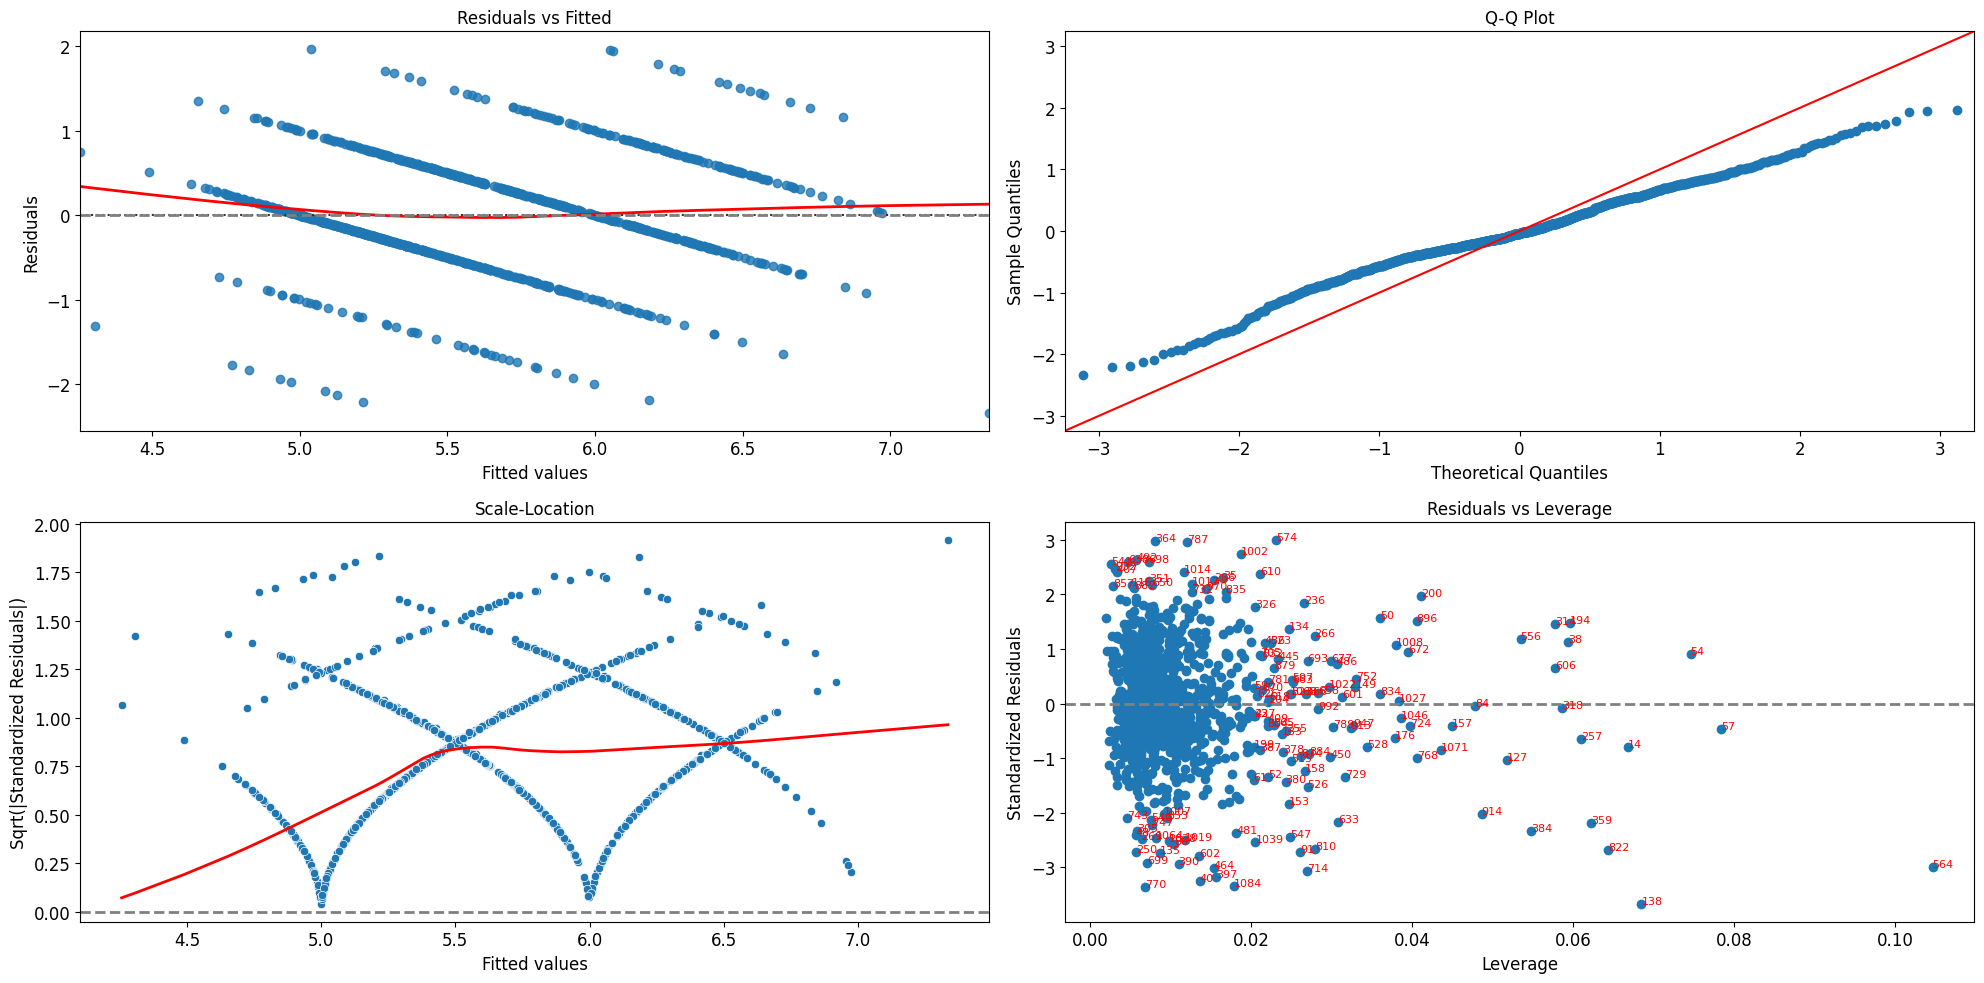

In [152]:
plot_diagnostic_plots(base_model)

- There seems to be some pattern to residuals , indicating possible non-linearity  and voilation of homoscadacity assumption.
- The qq plot demosntrates even normality assumption is voilated
- And there are alot of high leverage data points

In [153]:
summary_info = base_model.get_influence().summary_frame()

X_train_base_model["leverage"] = summary_info["hat_diag"]
X_train_base_model["cooks_dist"] = summary_info["cooks_d"]

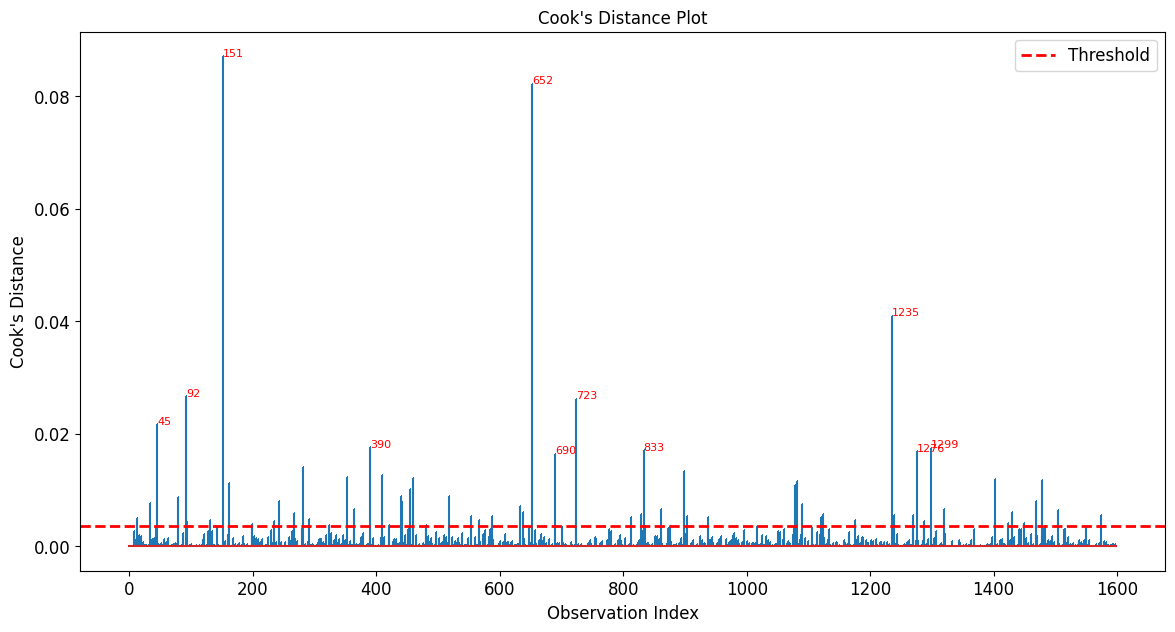

In [154]:
plot_cooks_distance(summary_info)

In [155]:
X_train_base_model.sort_values(by = "cooks_dist", ascending = False).head(10)

const  fixed acidity  volatile acidity  citric acid  residual sugar  \
151     1.0       0.486587         -0.064707     3.700386        0.877860   
652     1.0       4.232642         -0.926747     1.919157        3.624061   
1235    1.0      -1.302573         -1.088379     0.239713        6.242391   
92      1.0       0.151120         -0.226340     0.087037       -0.441045   
723     1.0      -0.687549         -1.196134     0.137929       -0.229176   
45      1.0      -2.085331         -0.064707    -0.625455       -0.333849   
390     1.0      -1.526218          1.713249    -1.134377       -1.150068   
1299    1.0      -0.407993          5.646305    -1.388839       -0.333849   
833     1.0       1.828458         -0.334095     0.850420       -0.899313   
1276    1.0       0.095209         -0.711237     0.646851        2.922297   

      chlorides  free sulfur dioxide  total sulfur dioxide   density  \
151    8.429332             1.465679              0.788662  1.508593   
652    0.346059             0.705690              0.840169  0.466571   
1235  -0.982774            -1.056532              1.789933 -0.512930   
92     0.720450             0.444991              2.178810  0.258166   
723   -1.019858             1.735522              2.065418 -0.106541   
45    -0.982774            -0.758543              0.683358 -1.721675   
390   -1.330113            -0.258660              1.251568 -2.242686   
1299   1.380454            -1.224363             -1.498112 -1.013100   
833    1.608114             1.735522              0.286546  0.862539   
1276  -1.133262            -1.620713             -1.428182 -0.544190   

            pH  sulphates   alcohol  leverage  cooks_dist  
151  -3.580926   6.384658 -0.951996  0.104670    0.087083  
652  -2.069411   1.174873  4.064685  0.068486    0.082218  
1235 -0.054057  -0.585632  0.963464  0.064314    0.040993  
92   -2.384310   6.310454 -0.587147  0.062220    0.026638  
723  -2.321330   4.904294 -0.860784  0.054749    0.026219  
45    3.724731  -0.585632  2.422862  0.027000    0.021724  
390   1.583418   1.059973  2.240437  0.023132    0.017610  
1299  1.205539  -1.798593  0.416190  0.048646    0.017537  
833   0.449781   1.288414 -0.495934  0.027990    0.017079  
1276 -0.180017  -0.585632  1.419526  0.017915    0.016918

## Model 2 without highest influential points

- Removing the most influential points 

In [156]:
most_influential_points = X_train_base_model[X_train_base_model['cooks_dist']> 0.02].index

- train and test datasets

In [157]:
X_train_base_cleaned = X_train_base_model.drop(index=most_influential_points)
y_train_model_2 = y_train_base_model.drop(index=most_influential_points)

X_train_model_2 = X_train_base_cleaned.drop(columns=['leverage', 'cooks_dist'])


In [158]:
X_test_model_2 = X_test_base_model.copy()
y_test_model_2 = y_test_base_model.copy()

**Modelling**

In [159]:
base_model_2, vif_model_2 = fit_and_evaluate_model(X_train_model_2, y_train_model_2)

In [160]:
base_model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.387
Model:                            OLS   Adj. R-squared:                  0.381
Method:                 Least Squares   F-statistic:                     61.45
Date:                Thu, 15 Aug 2024   Prob (F-statistic):          9.37e-106
Time:                        00:30:22   Log-Likelihood:                -1056.4
No. Observations:                1081   AIC:                             2137.
Df Residuals:                    1069   BIC:                             2197.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    5.6365      0.020    286.546      0.000       5.598       5.675
fixed acidity            0.0378      0.058      0.651      0.515      -0.076       0.152
volatile acidity        -0.1829      0.026     -6.947      0.000      -0.235      -0.131
citric acid             -0.0072      0.036     -0.202      0.840      -0.077       0.063
residual sugar           0.0034      0.027      0.125      0.901      -0.050       0.056
chlorides               -0.0795      0.024     -3.304      0.001      -0.127      -0.032
free sulfur dioxide      0.0518      0.032      1.643      0.101      -0.010       0.114
total sulfur dioxide    -0.0712      0.034     -2.123      0.034      -0.137      -0.005
density                 -0.0325      0.053     -0.613      0.540      -0.136       0.071
pH                      -0.0659      0.037     -1.769      0.077      -0.139       0.007
sulphates                0.1925      0.024      7.937      0.000       0.145       0.240
alcohol                  0.3105      0.036      8.590      0.000       0.240       0.381
==============================================================================
Omnibus:                       11.594   Durbin-Watson:                   1.901
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               14.662
Skew:                          -0.140   Prob(JB):                     0.000655
Kurtosis:                       3.497   Cond. No.                         7.73
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Adjusted R-squared has improved

In [161]:
model_results = pd.DataFrame(columns= ['Model_Name', 'Model_Description', 'Adj_R_squared', 'AIC', 'BIC'])

model_results = extract_and_rank_model_metrics(base_model, 'base_model', 'Base model with all features', model_results)
model_results = extract_and_rank_model_metrics(base_model_2, 'base_model_2', 'Model after removing most influential points', model_results)


In [162]:
display(model_results)

Model_Name                             Model_Description  Adj_R_squared  \
0    base_model                  Base model with all features       0.358701   
1  base_model_2  Model after removing most influential points       0.381079   

           AIC          BIC  Rank_Adj_R_squared  Rank_AIC  Rank_BIC  \
0  2194.769586  2254.663709                 2.0       2.0       2.0   
1  2136.848961  2196.676663                 1.0       1.0       1.0   

   Total_Rank  Final_Rank  
0         6.0         2.0  
1         3.0         1.0

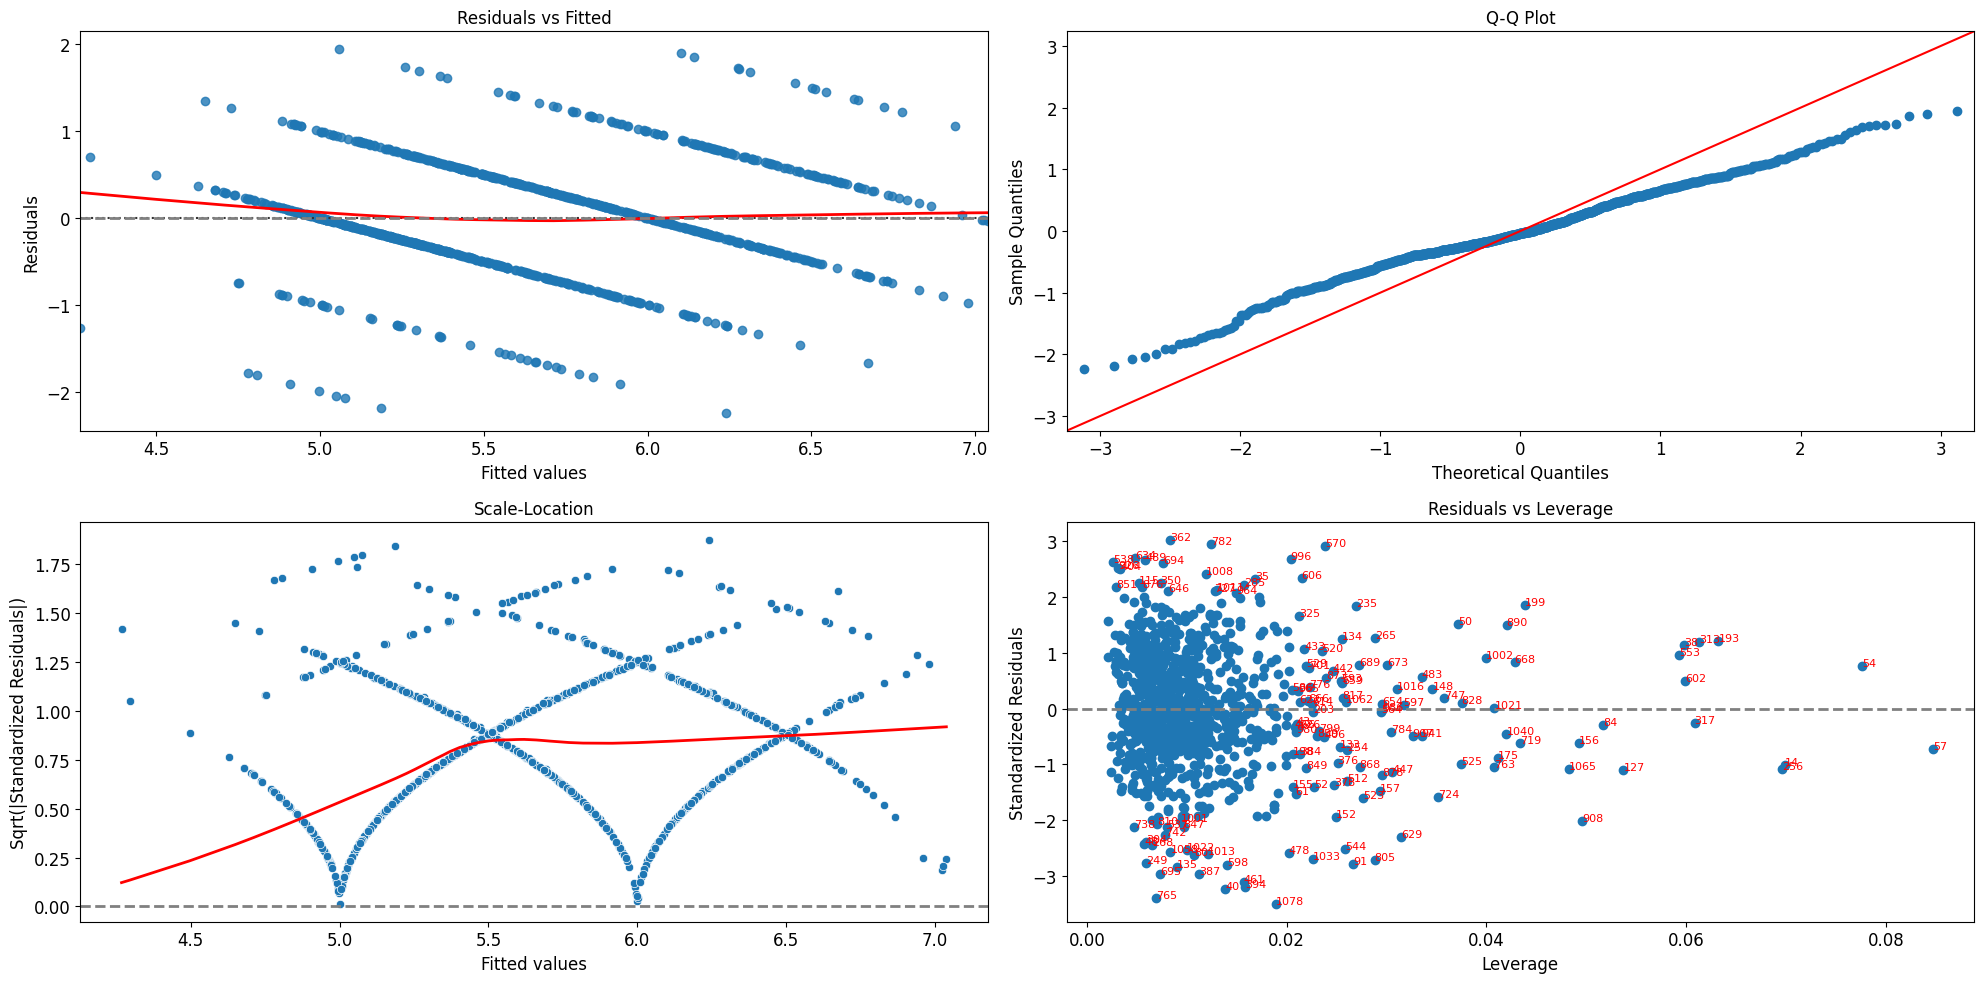

In [163]:
plot_diagnostic_plots(base_model_2)

- The linear regression assumptions are still voilated 

## Transformed response variable

In [164]:
df2 = wine_df2.copy()

In [165]:
df2['log_quality'] = np.log(df2['quality'])
df2['sqrt_quality'] = np.sqrt(df2['quality'])
df2['boxcox_quality'], _ = stats.boxcox(df2['quality'])

In [166]:
quality_features = [name for name in df2.columns if "quality" in name]
print(quality_features)

['quality', 'log_quality', 'sqrt_quality', 'boxcox_quality']


In [167]:
X_train_log, X_test_log, y_train_log, y_test_log = preprocess_data(df2, target_variable = 'log_quality', drop_features= quality_features)
model_log, vif_log = fit_and_evaluate_model(X_train_log, y_train_log)
print('log transformed model')
print(model_log.summary())

log transformed model
                            OLS Regression Results                            
Dep. Variable:            log_quality   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.331
Method:                 Least Squares   F-statistic:                     49.94
Date:                Thu, 15 Aug 2024   Prob (F-statistic):           1.30e-88
Time:                        00:30:24   Log-Likelihood:                 764.61
No. Observations:                1087   AIC:                            -1505.
Df Residuals:                    1075   BIC:                            -1445.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const     

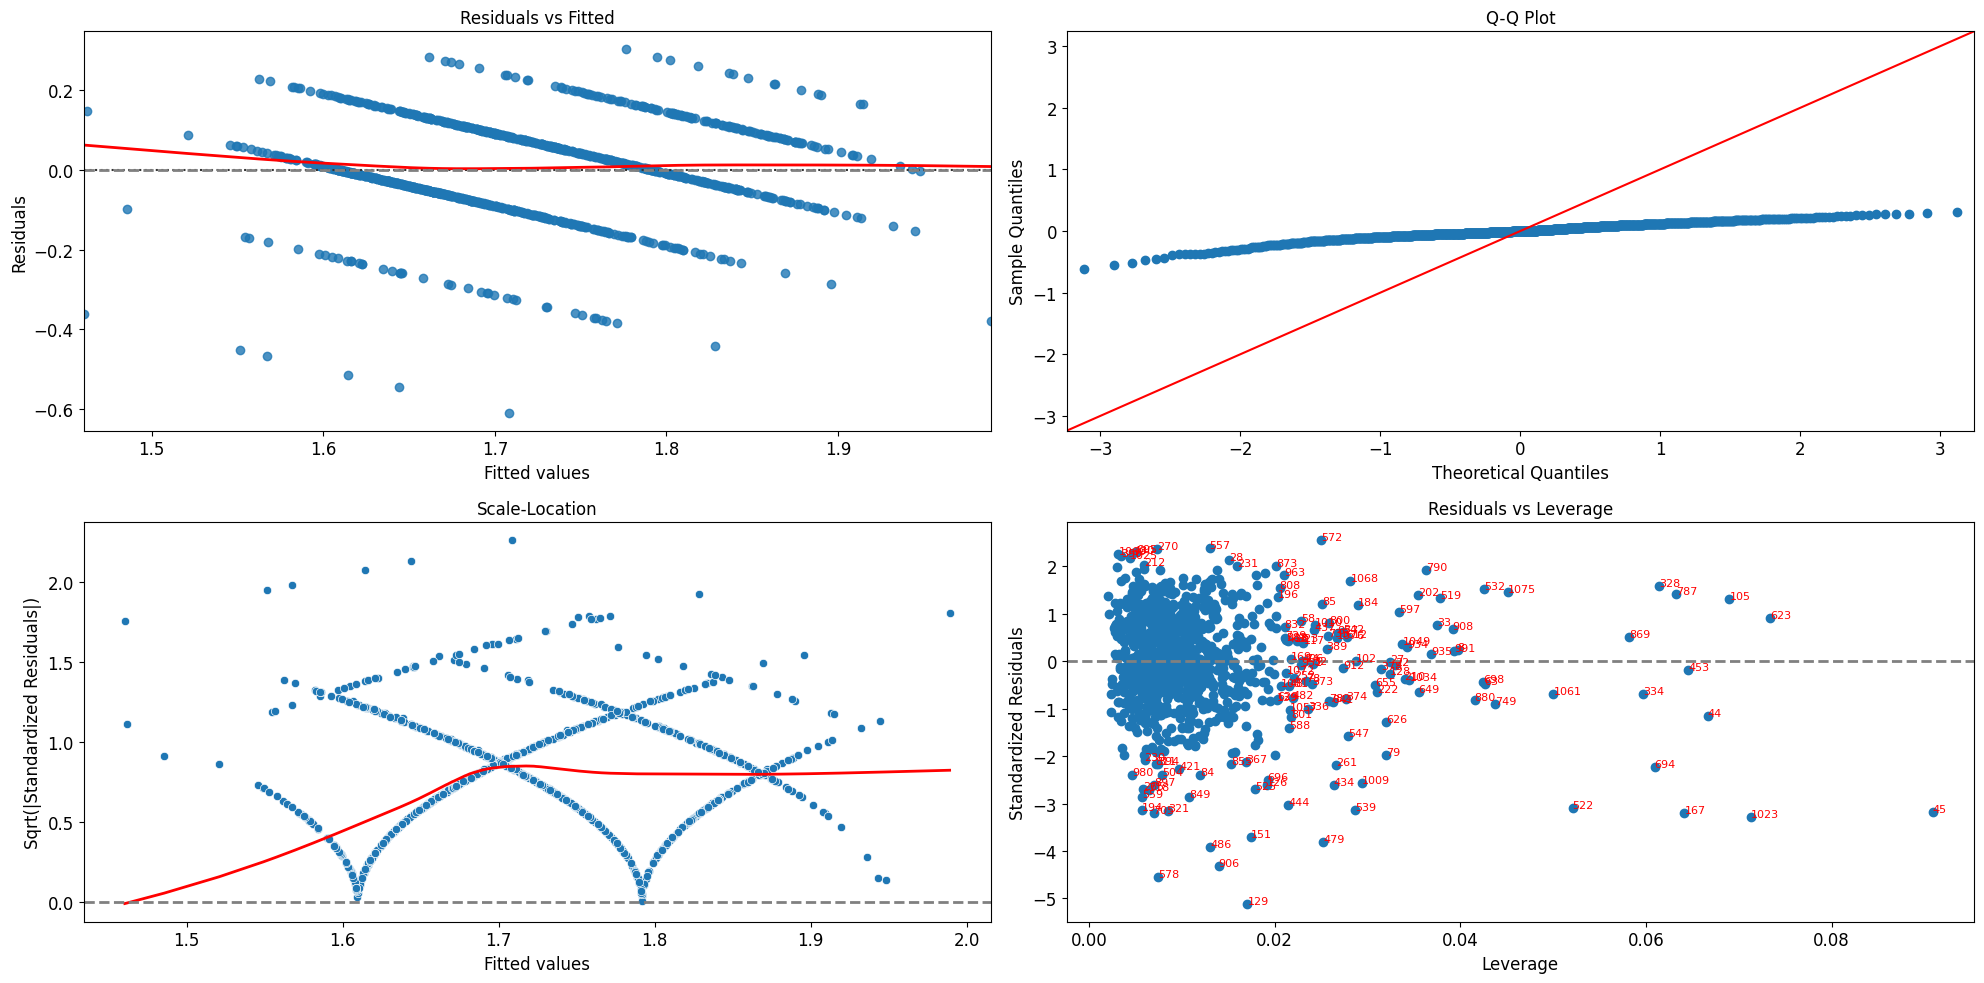

In [168]:
plot_diagnostic_plots(model_log)

square root transformed model
                            OLS Regression Results                            
Dep. Variable:           sqrt_quality   R-squared:                       0.349
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     52.34
Date:                Thu, 15 Aug 2024   Prob (F-statistic):           2.57e-92
Time:                        00:30:26   Log-Likelihood:                 600.08
No. Observations:                1087   AIC:                            -1176.
Df Residuals:                    1075   BIC:                            -1116.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

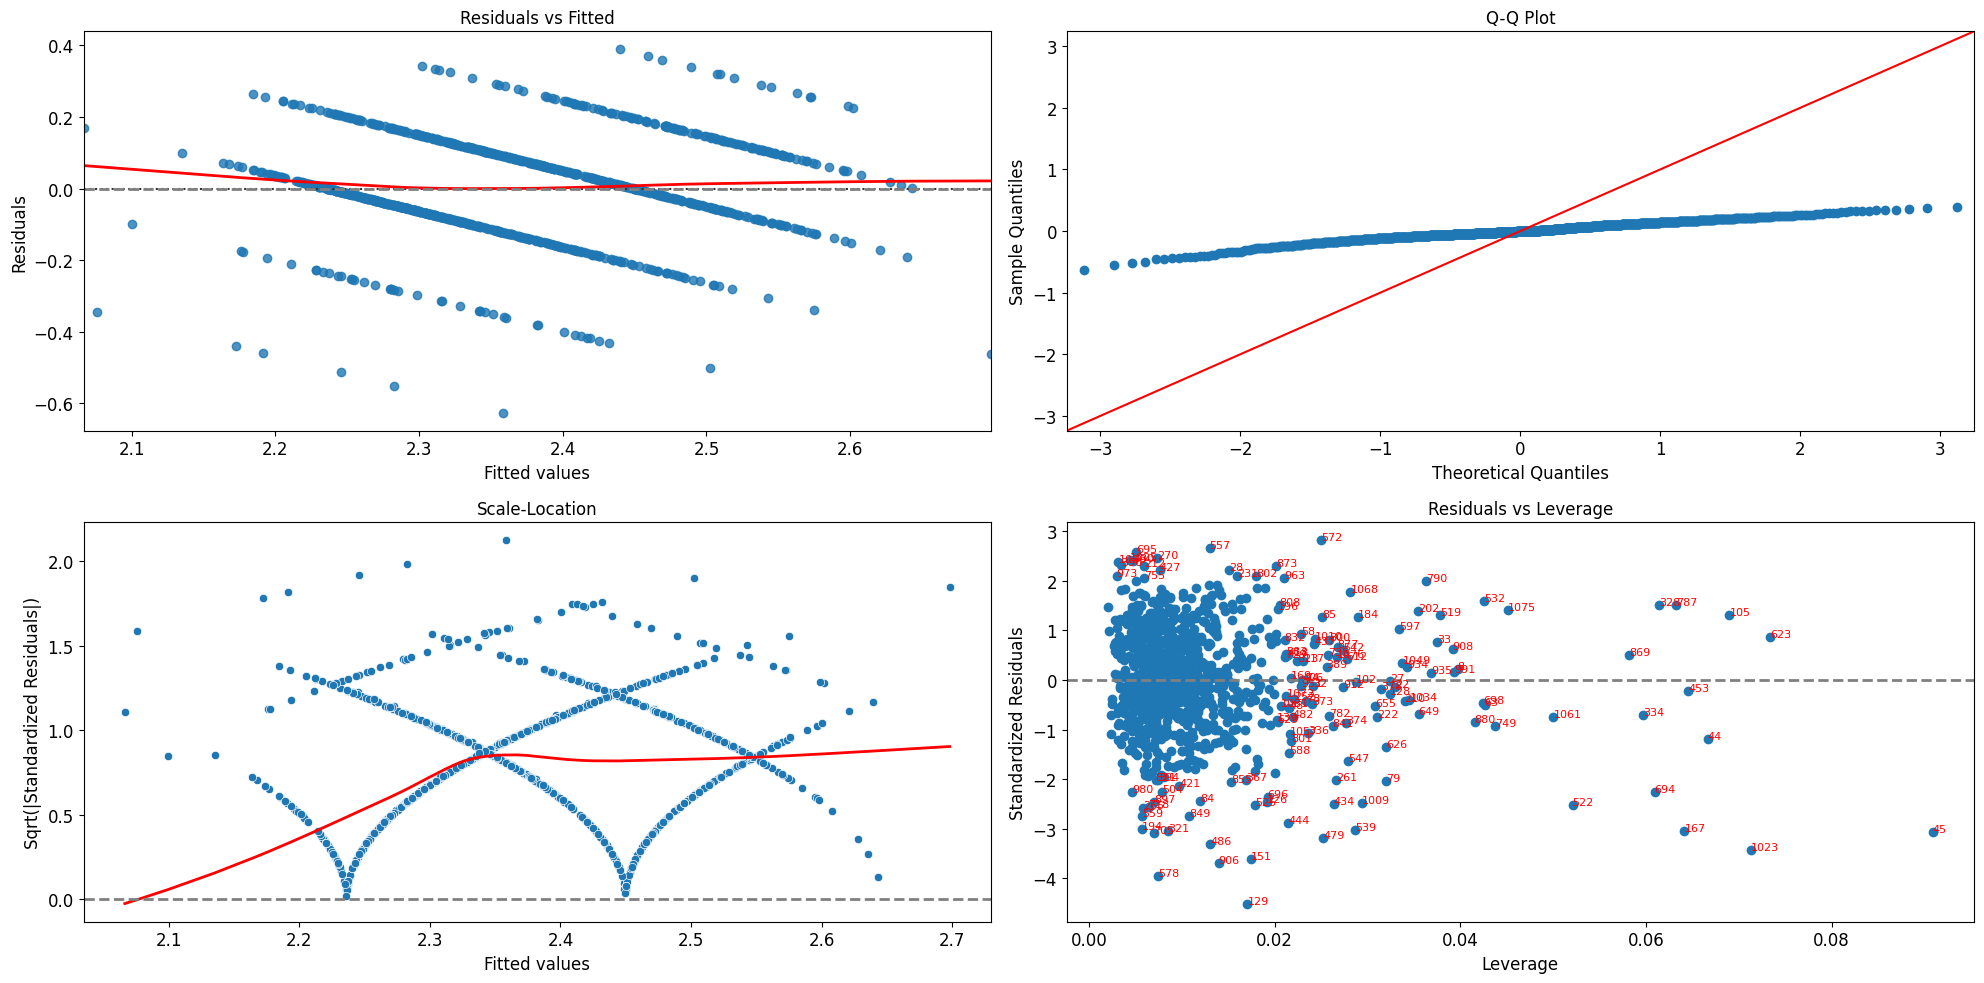

In [169]:
X_train_sqrt, X_test_sqrt, y_train_sqrt, y_test_sqrt = preprocess_data(df2, target_variable = 'sqrt_quality', drop_features= quality_features)
model_sqrt, vif_sqrt = fit_and_evaluate_model(X_train_sqrt, y_train_sqrt)
print('square root transformed model')
print(model_sqrt.summary())


plot_diagnostic_plots(model_sqrt)

Box Cox transformed model
                            OLS Regression Results                            
Dep. Variable:         boxcox_quality   R-squared:                       0.352
Model:                            OLS   Adj. R-squared:                  0.345
Method:                 Least Squares   F-statistic:                     53.08
Date:                Thu, 15 Aug 2024   Prob (F-statistic):           1.89e-93
Time:                        00:30:28   Log-Likelihood:                -494.53
No. Observations:                1087   AIC:                             1013.
Df Residuals:                    1075   BIC:                             1073.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const 

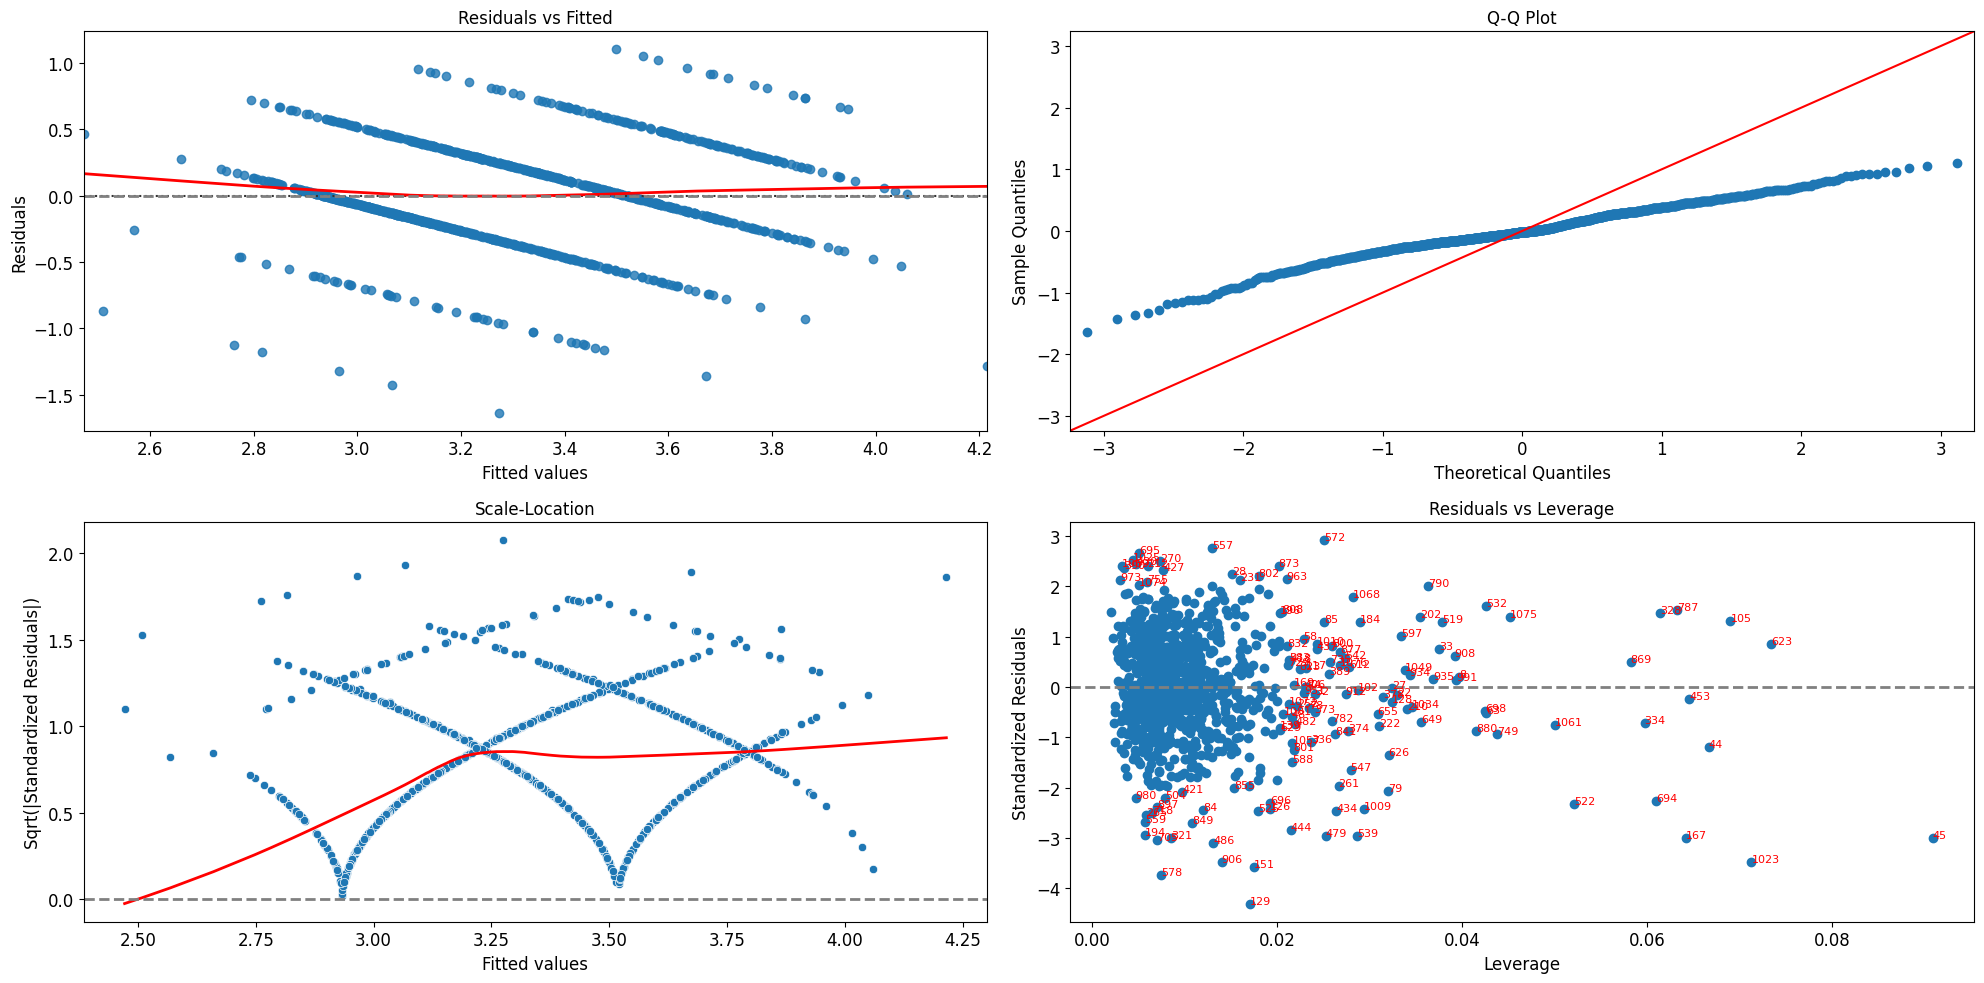

In [170]:
X_train_box, X_test_box, y_train_box, y_test_box = preprocess_data(df2, target_variable = 'boxcox_quality', drop_features= quality_features)
model_box, vif_box = fit_and_evaluate_model(X_train_box, y_train_box)
print('Box Cox transformed model')
print(model_box.summary())


plot_diagnostic_plots(model_box)

        - To address heteroscedasticity and non-normality in the residuals, various transformations of the response variable were attempted, including:

            - Log Transformation
            - Square Root Transformation
            - Box-Cox Transformation
            
        However, none of these transformations improved the residual diagnostics (e.g., residuals vs. fitted plot, scale-location plot). The patterns in the residuals remained unchanged, i

**Conclusion**
  
  Given the lack of improvement, the analysis will proceed with the original response variable. Alternative methods, such as robust standard errors or different modeling approaches, will be explored to address the residual issues.

###  Addressing Potential non-linearity 

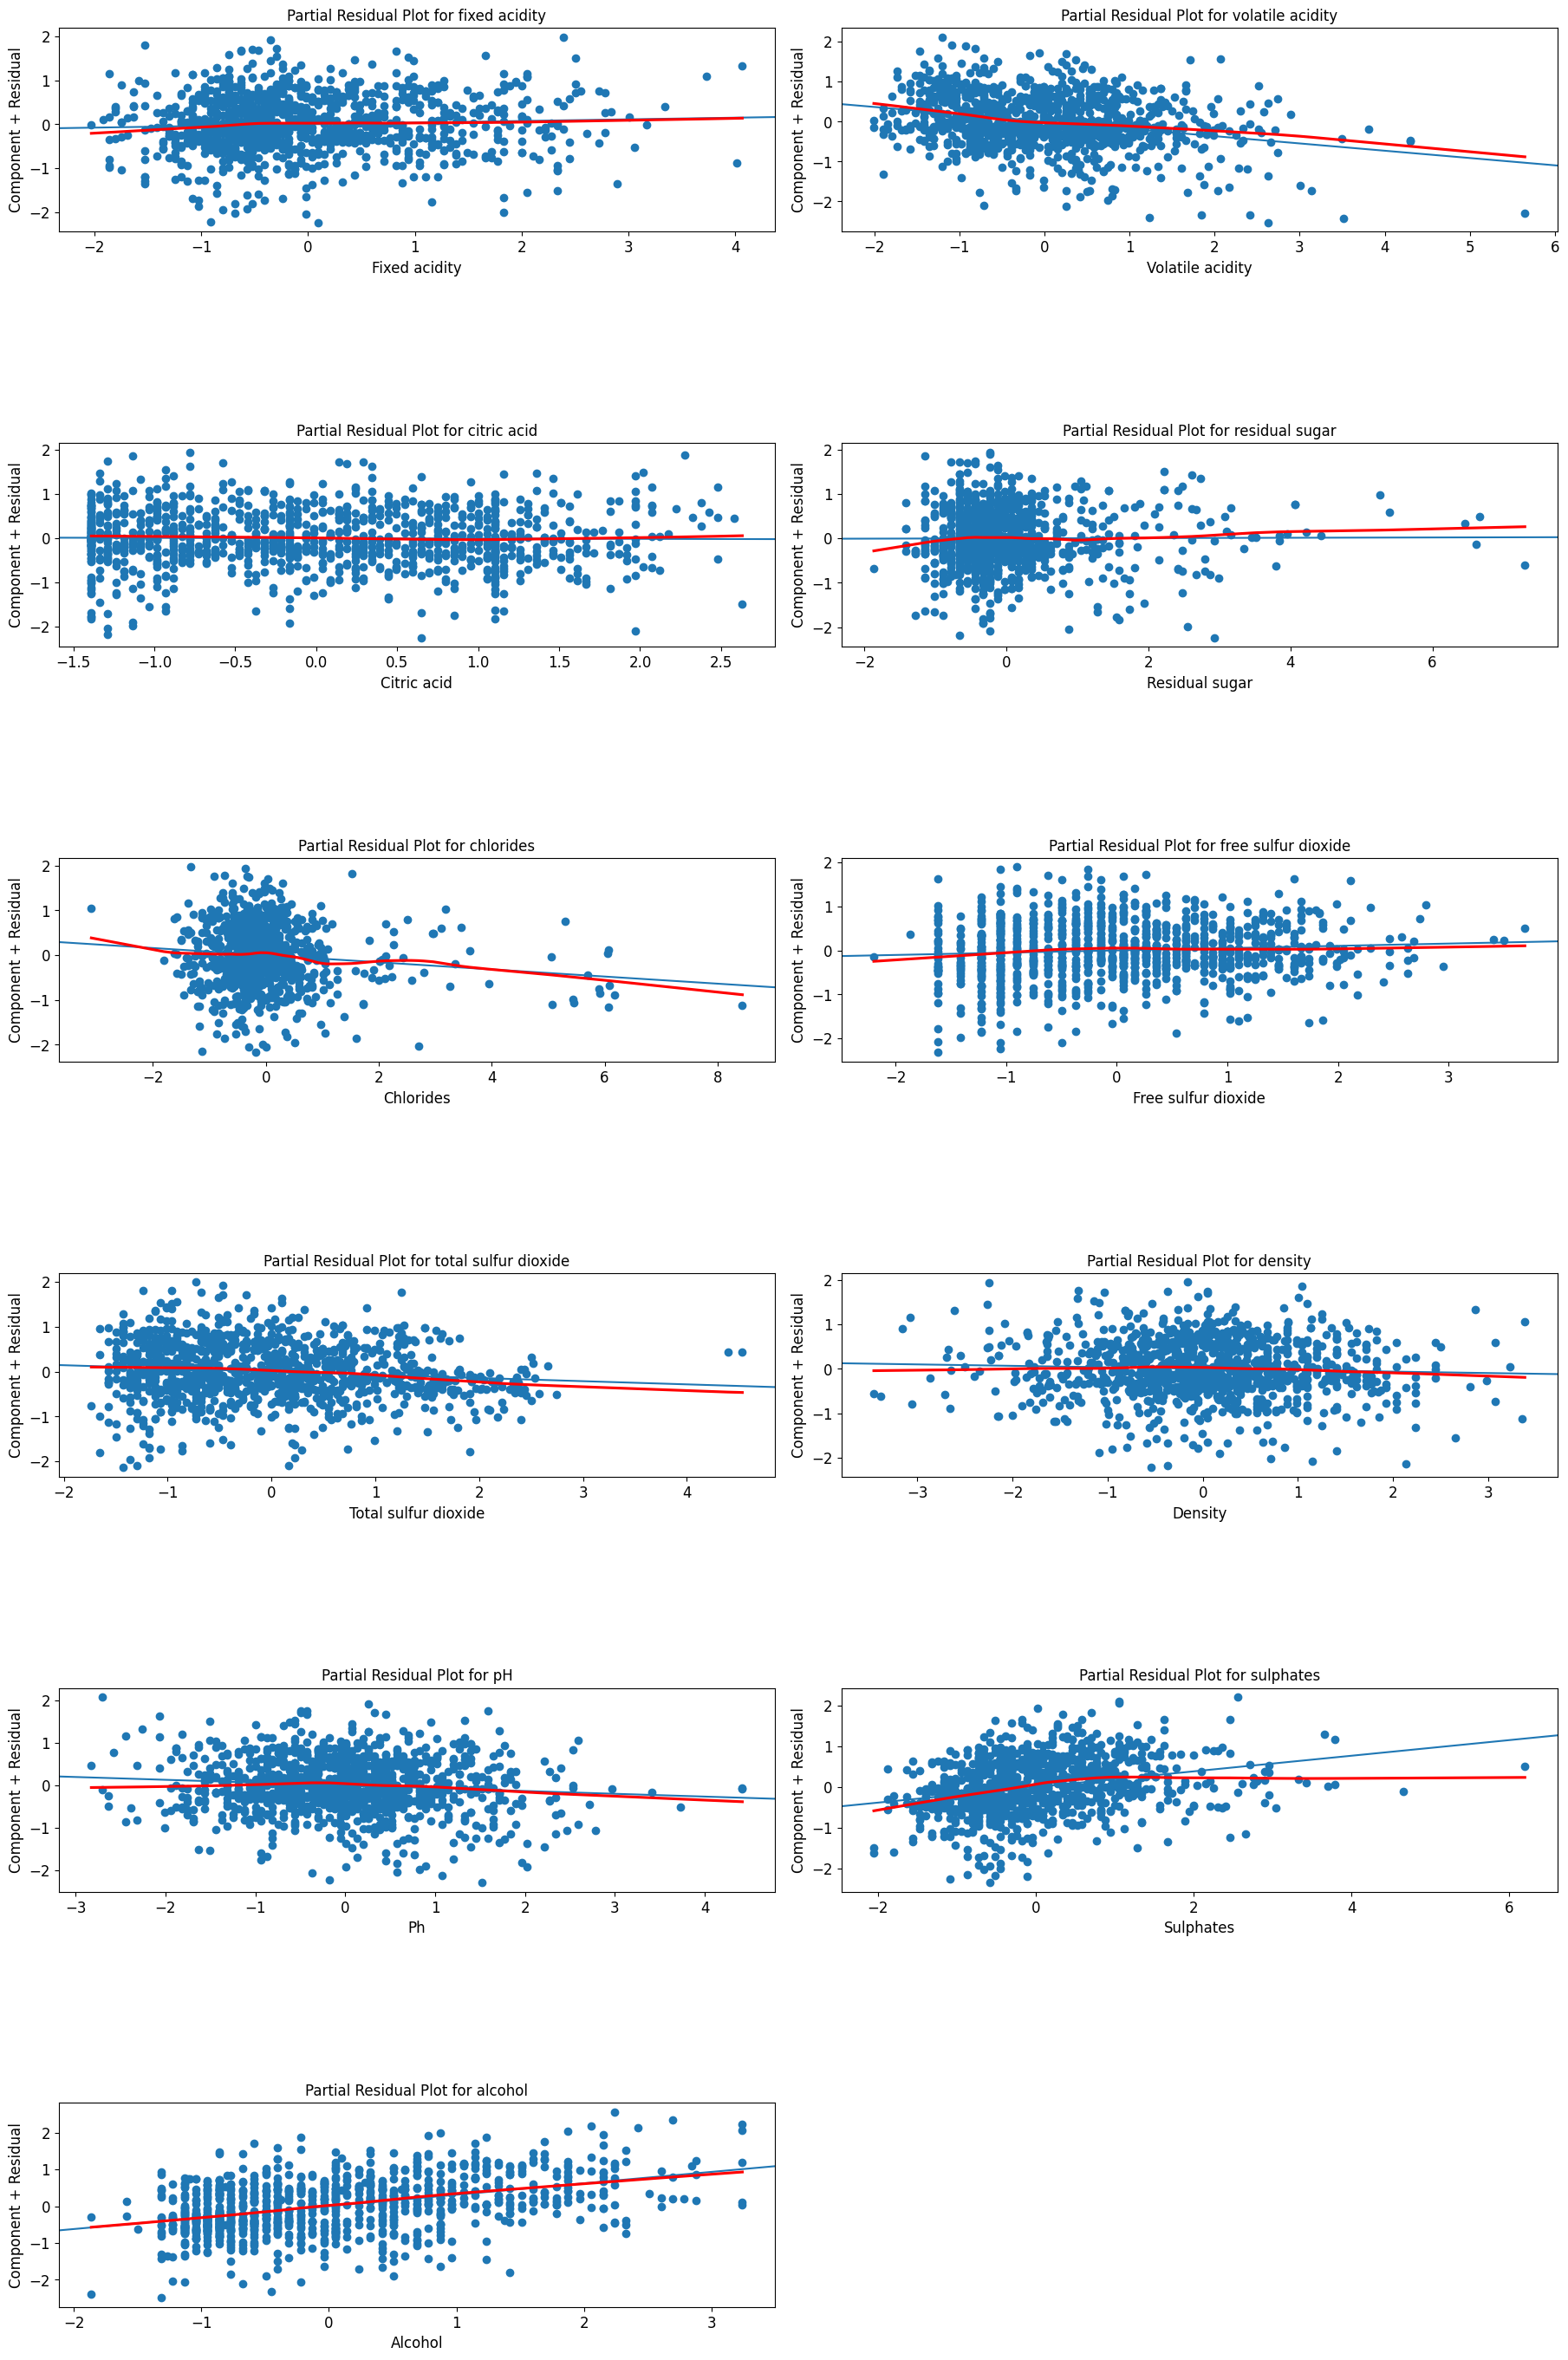

In [171]:
generate_partial_residual_plots(base_model_2, X_train_model_2)

-  The partial resdiual for all features doesn't indicate non-linearity apart form sulphates
- The sulphates feature incdicates a curve-linear realtionship

------

### Adding Polyomial and Interaction Terms

- Interaction terms are selected based on features that demonstrate the strongest partial correlations in the bivariate analysis.
- Polynomial terms are identified by insights gained from the partial residual plots.

In [172]:
X_train_model_3 = X_train_model_2.copy()
X_test_model_3 = X_test_model_2.copy()

In [173]:
poly = PolynomialFeatures(degree=2, include_bias=False)
sulphates_poly = poly.fit_transform(X_train_model_3[['sulphates']])

In [174]:
X_train_model_3['sulphates^2'] = sulphates_poly[:, 1]

In [175]:
sulphates_poly_test = poly.transform(X_test_model_3[['sulphates']])
X_test_model_3['sulphates^2'] = sulphates_poly_test[:, 1]

- **Adding interaction terms**

In [176]:
X_train_model_3['volatile_acidity*sulphates'] = X_train_model_2['volatile acidity'] * X_train_model_2['sulphates']
X_train_model_3['volatile_acidity*alcohol'] = X_train_model_2['volatile acidity'] * X_train_model_2['alcohol']
X_train_model_3['sulphates*alcohol'] = X_train_model_2['sulphates'] * X_train_model_2['alcohol']


In [177]:
X_test_model_3['volatile_acidity*sulphates'] = X_test_model_3['volatile acidity'] * X_test_model_3['sulphates']
X_test_model_3['volatile_acidity*alcohol'] = X_test_model_3['volatile acidity'] * X_test_model_3['alcohol']
X_test_model_3['sulphates*alcohol'] = X_test_model_3['sulphates'] * X_test_model_3['alcohol']


In [178]:
base_model_3, vif_all_base_model_3 = fit_and_evaluate_model(X_train_model_3, y_train_model_2)


In [179]:
base_model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.408
Model:                            OLS   Adj. R-squared:                  0.400
Method:                 Least Squares   F-statistic:                     48.95
Date:                Thu, 15 Aug 2024   Prob (F-statistic):          4.76e-110
Time:                        00:30:38   Log-Likelihood:                -1037.9
No. Observations:                1081   AIC:                             2108.
Df Residuals:                    1065   BIC:                             2187.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          5.6740      0.024    239.198      0.000       5.628       5.721
fixed acidity                  0.0393      0.058      0.680      0.496      -0.074       0.153
volatile acidity              -0.1706      0.027     -6.334      0.000      -0.223      -0.118
citric acid                   -0.0124      0.035     -0.352      0.725      -0.082       0.057
residual sugar                 0.0121      0.027      0.455      0.649      -0.040       0.064
chlorides                     -0.0499      0.024     -2.047      0.041      -0.098      -0.002
free sulfur dioxide            0.0373      0.031      1.194      0.233      -0.024       0.099
total sulfur dioxide          -0.0658      0.033     -1.967      0.049      -0.131      -0.000
density                       -0.0770      0.053     -1.448      0.148      -0.181       0.027
pH                            -0.0872      0.038     -2.300      0.022      -0.162      -0.013
sulphates                      0.2750      0.029      9.532      0.000       0.218       0.332
alcohol                        0.2756      0.036      7.560      0.000       0.204       0.347
sulphates^2                   -0.0547      0.013     -4.278      0.000      -0.080      -0.030
volatile_acidity*sulphates    -0.0112      0.021     -0.525      0.600      -0.053       0.031
volatile_acidity*alcohol      -0.0003      0.023     -0.013      0.989      -0.045       0.045
sulphates*alcohol              0.0758      0.023      3.280      0.001       0.030       0.121
==============================================================================
Omnibus:                       10.961   Durbin-Watson:                   1.875
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               13.855
Skew:                          -0.132   Prob(JB):                     0.000980
Kurtosis:                       3.488   Cond. No.                         10.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

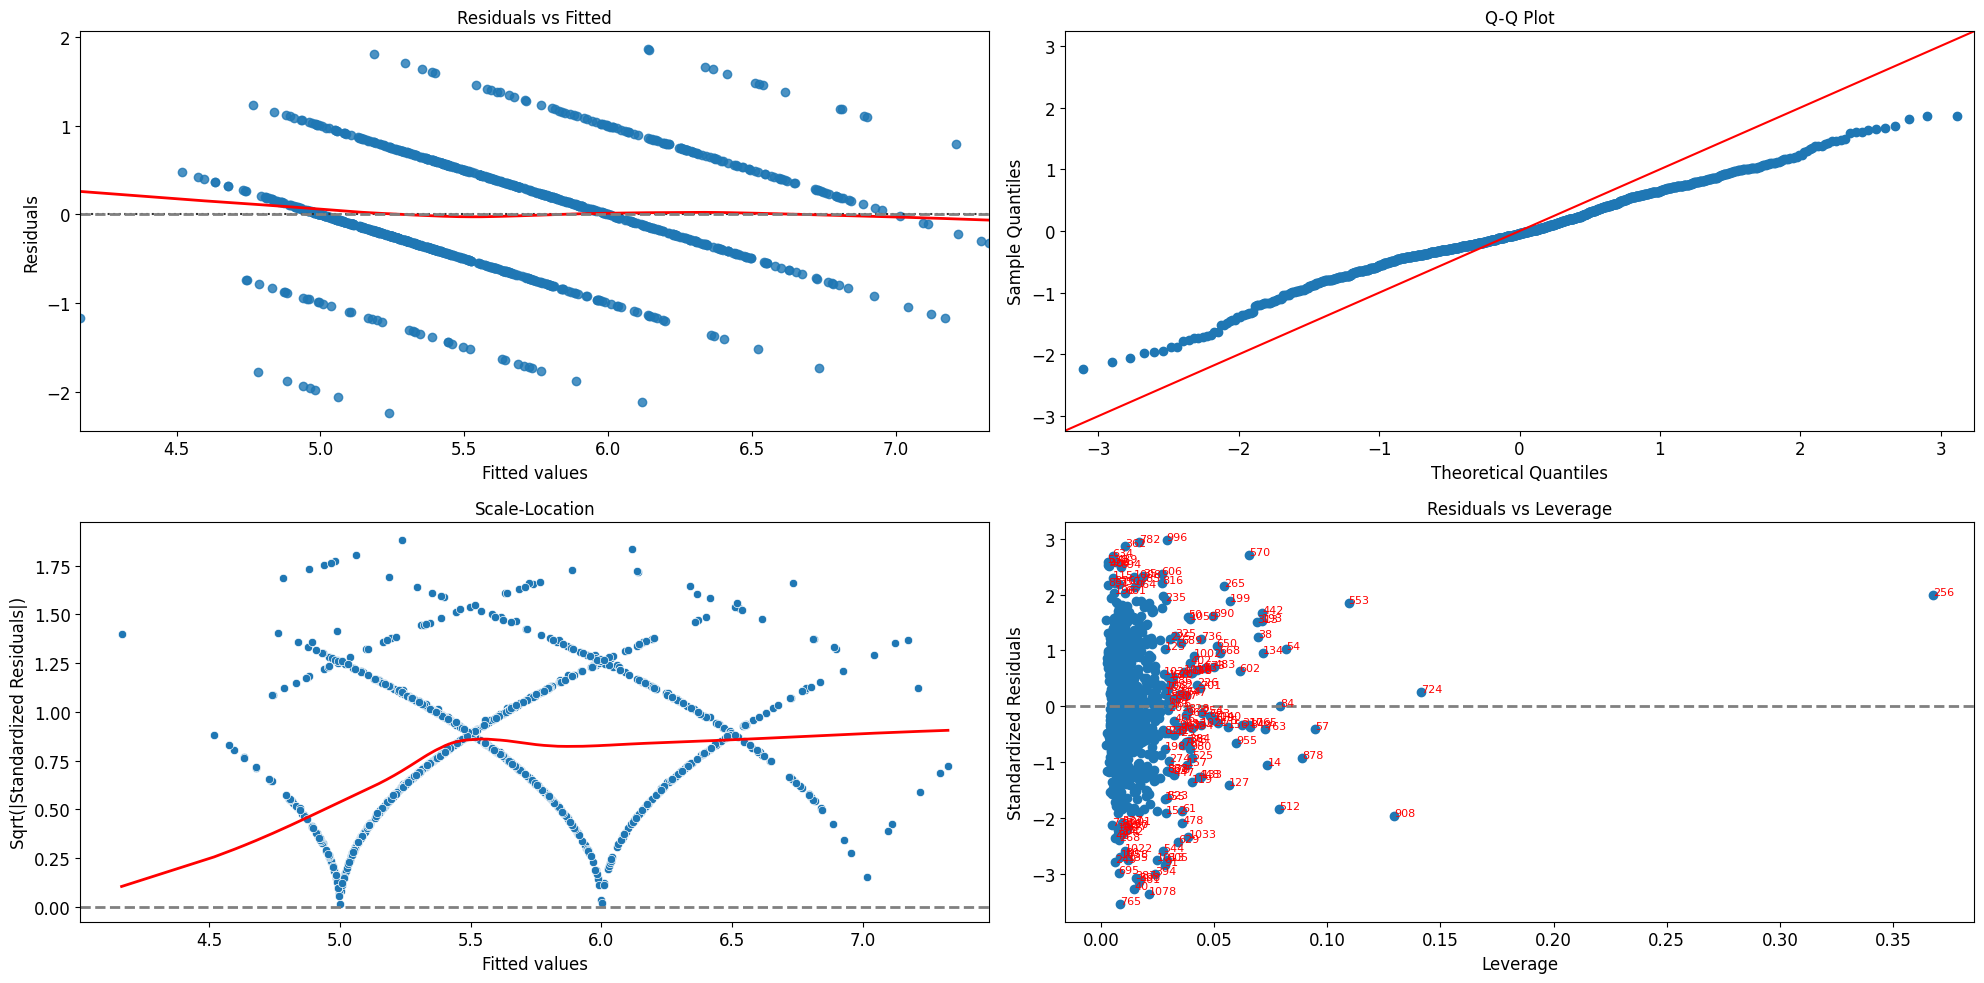

In [180]:
plot_diagnostic_plots(base_model_3)

- The explanotary power of the model has impoved, however the diagnostic plots doesn't show much improvement. 

### **Comparing comparison:**

In [181]:
model_results = extract_and_rank_model_metrics(base_model_3, 'base_model_3', 'Base model with polynomial features and interaciton terms', model_results)

In [182]:
display(model_results)

Model_Name                                  Model_Description  \
0    base_model                       Base model with all features   
1  base_model_2       Model after removing most influential points   
2  base_model_3  Base model with polynomial features and intera...   

   Adj_R_squared          AIC          BIC  Rank_Adj_R_squared  Rank_AIC  \
0       0.358701  2194.769586  2254.663709                 3.0       3.0   
1       0.381079  2136.848961  2196.676663                 2.0       2.0   
2       0.399740  2107.702033  2187.472302                 1.0       1.0   

   Rank_BIC  Total_Rank  Final_Rank  
0       3.0         9.0         3.0  
1       2.0         6.0         2.0  
2       1.0         3.0         1.0

- **Model 3 fits the data better relative to the selected metrics.**
-  **Howver**  The heteroskadacity porblems persists .


----



**To address heteroskedasticity and ensure valid inferences,we will consider using:**

- Weighted Least Squares (WLS): Adjusts for heteroskedasticity by weighting observations based on their variance.
- Robust Standard Errors: Provides valid statistical inference by correcting standard errors for heteroskedasticity.

### Weighted least squares

In [183]:
model_wls, vif_data_wls = fit_and_evaluate_model(X_train_model_2, y_train_model_2, wls = True)
print(model_wls.summary())

print(vif_data_wls)

                            WLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.392
Model:                            WLS   Adj. R-squared:                  0.386
Method:                 Least Squares   F-statistic:                     62.61
Date:                Thu, 15 Aug 2024   Prob (F-statistic):          2.01e-107
Time:                        00:30:40   Log-Likelihood:                -1057.8
No. Observations:                1081   AIC:                             2140.
Df Residuals:                    1069   BIC:                             2199.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    5.6374 

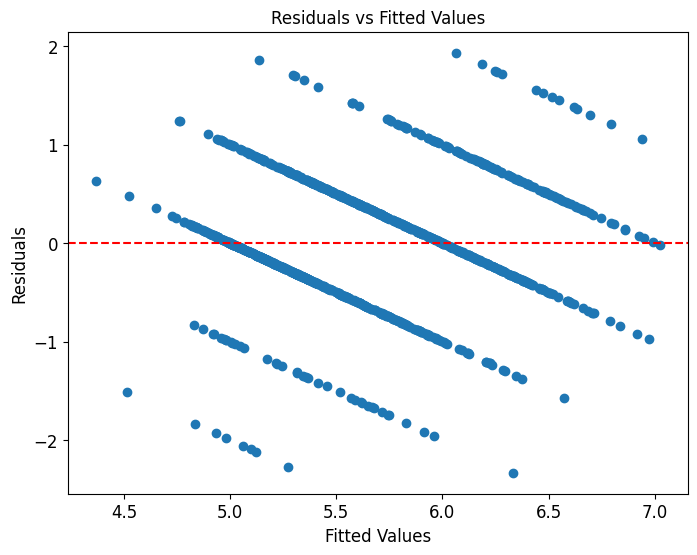

<Figure size 800x600 with 0 Axes>

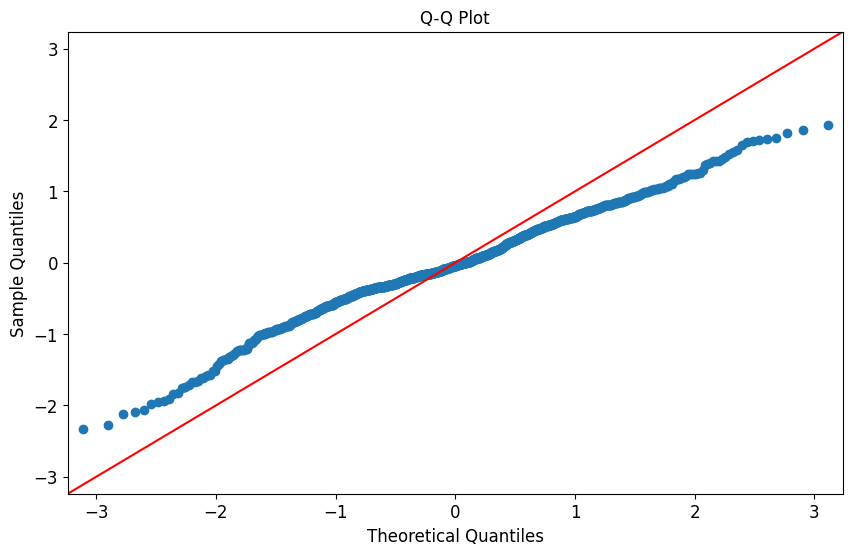

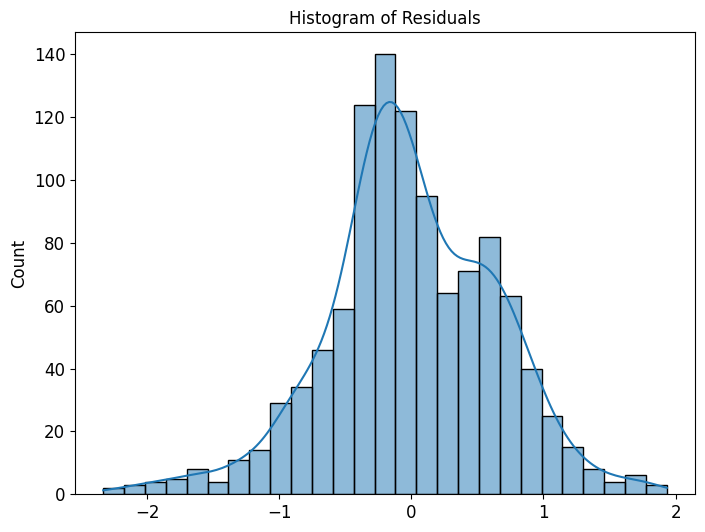

In [184]:
plt.figure(figsize=(8, 6))
plt.scatter(model_wls.fittedvalues, model_wls.resid)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.axhline(0, color='red', linestyle='--')
plt.show()

plt.figure(figsize=(8, 6))
sm.qqplot(model_wls.resid, line ='45')
plt.title('Q-Q Plot')
plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(model_wls.resid, kde=True)
plt.title('Histogram of Residuals')
plt.show()

- There is not much improvement, and the assumptions are still voilated

In [185]:
model_results = extract_and_rank_model_metrics(model_wls, 'model_wls', 'model with weighted least squares', model_results)

### Robust Standard Errors

In [186]:
model_robust, vif_robust  = model_wls, vif_data_wls = fit_and_evaluate_model(X_train_model_3, y_train_model_2, robust= True)
model_robust.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.408
Model:                            OLS   Adj. R-squared:                  0.400
Method:                 Least Squares   F-statistic:                     48.84
Date:                Thu, 15 Aug 2024   Prob (F-statistic):          7.60e-110
Time:                        00:30:40   Log-Likelihood:                -1037.9
No. Observations:                1081   AIC:                             2108.
Df Residuals:                    1065   BIC:                             2187.
Df Model:                          15                                         
Covariance Type:                  HC3                                         
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          5.6740      0.028    206.236      0.000       5.620       5.728
fixed acidity                  0.0393      0.065      0.609      0.543      -0.087       0.166
volatile acidity              -0.1706      0.031     -5.582      0.000      -0.230      -0.111
citric acid                   -0.0124      0.034     -0.362      0.717      -0.079       0.055
residual sugar                 0.0121      0.031      0.393      0.694      -0.048       0.073
chlorides                     -0.0499      0.027     -1.817      0.069      -0.104       0.004
free sulfur dioxide            0.0373      0.030      1.253      0.210      -0.021       0.096
total sulfur dioxide          -0.0658      0.031     -2.104      0.035      -0.127      -0.005
density                       -0.0770      0.060     -1.273      0.203      -0.196       0.042
pH                            -0.0872      0.041     -2.126      0.033      -0.168      -0.007
sulphates                      0.2750      0.030      9.301      0.000       0.217       0.333
alcohol                        0.2756      0.042      6.584      0.000       0.194       0.358
sulphates^2                   -0.0547      0.020     -2.736      0.006      -0.094      -0.016
volatile_acidity*sulphates    -0.0112      0.027     -0.412      0.680      -0.065       0.042
volatile_acidity*alcohol      -0.0003      0.026     -0.012      0.991      -0.052       0.051
sulphates*alcohol              0.0758      0.025      3.061      0.002       0.027       0.124
==============================================================================
Omnibus:                       10.961   Durbin-Watson:                   1.875
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               13.855
Skew:                          -0.132   Prob(JB):                     0.000980
Kurtosis:                       3.488   Cond. No.                         10.6
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC3)
"""

                -  Since the standard errors are robust, we can make inference, despite the voilation for asusmptions.
                -  Based on that , the non statistically signifacant features ares dropped

**Modeling with statistically significant features**

In [187]:
summary = model_robust.summary2().tables[1]

significant_features = summary[summary['P>|z|'] < 0.05].index

X_train_significant = X_train_model_3[significant_features]

model_significant, vif_significant = model_wls, vif_data_wls = fit_and_evaluate_model(X_train_significant, y_train_model_2, robust=True)

print(model_significant.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.401
Model:                            OLS   Adj. R-squared:                  0.397
Method:                 Least Squares   F-statistic:                     100.6
Date:                Thu, 15 Aug 2024   Prob (F-statistic):          5.78e-113
Time:                        00:30:40   Log-Likelihood:                -1044.5
No. Observations:                1081   AIC:                             2105.
Df Residuals:                    1073   BIC:                             2145.
Df Model:                           7                                         
Covariance Type:                  HC3                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    5.6722 

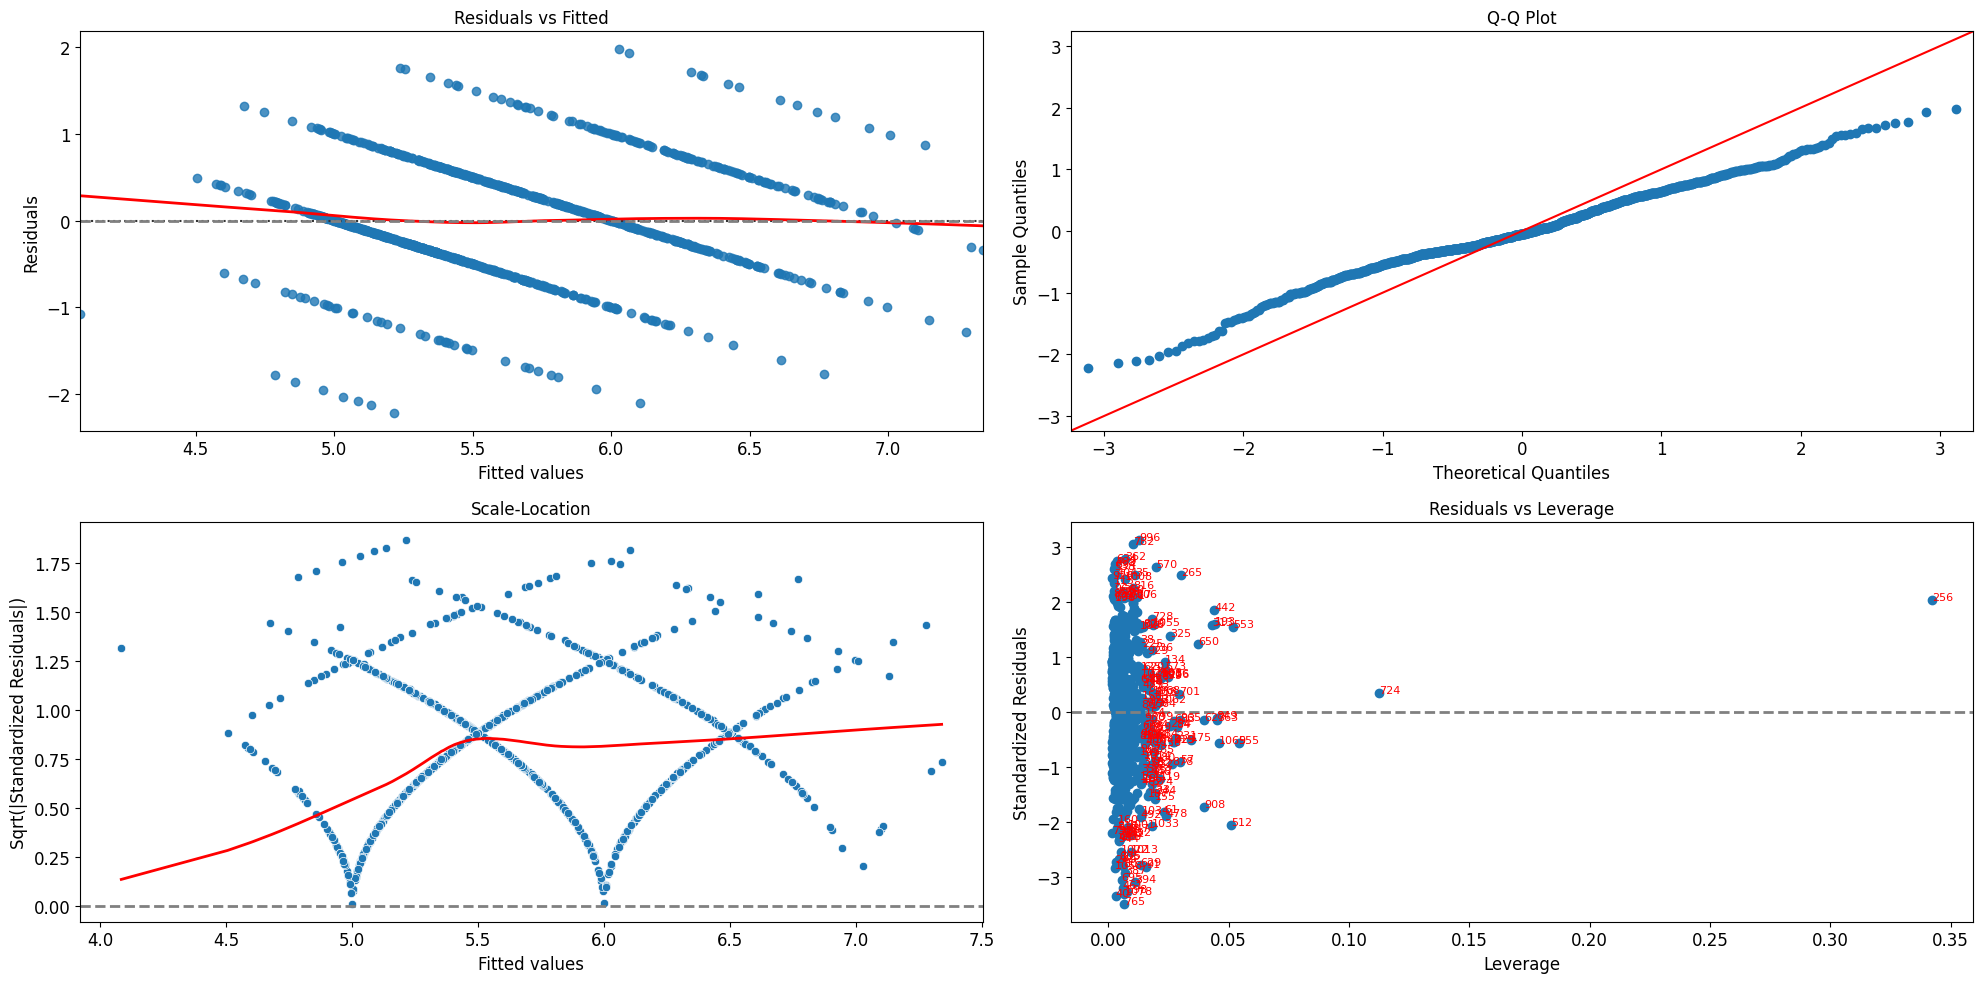

In [188]:
plot_diagnostic_plots(model_significant)

-  we can see the assumption for linear regression are still voilated

### Comapring Models

In [189]:
model_results = extract_and_rank_model_metrics(model_significant, 'model significant', 'Model usign robust standard error and non signifanct feautres removed', model_results)


In [190]:
display(model_results)

Model_Name                                  Model_Description  \
0         base_model                       Base model with all features   
1       base_model_2       Model after removing most influential points   
2       base_model_3  Base model with polynomial features and intera...   
3          model_wls                  model with weighted least squares   
4  model significant  Model usign robust standard error and non sign...   

   Adj_R_squared          AIC          BIC  Rank_Adj_R_squared  Rank_AIC  \
0       0.358701  2194.769586  2254.663709                 5.0       5.0   
1       0.381079  2136.848961  2196.676663                 4.0       3.0   
2       0.399740  2107.702033  2187.472302                 1.0       2.0   
3       0.385572  2139.656433  2199.484135                 3.0       4.0   
4       0.396832  2105.016231  2144.901366                 2.0       1.0   

   Rank_BIC  Total_Rank  Final_Rank  
0       5.0        15.0         5.0  
1       3.0        10.0         3.0  
2       2.0         5.0         2.0  
3       4.0        11.0         4.0  
4       1.0         4.0         1.0

### Predictive Performance

- Looking at the Mean squared eror metric 

In [191]:
y_pred_base = base_model.predict(X_test_base_model)
y_pred_base_2 = base_model_2.predict(X_test_model_2)
y_pred_base_3 = base_model_3.predict(X_test_model_3)
y_pred_significant = model_significant.predict(X_test_model_3[significant_features])

mse_base = mean_squared_error(y_test_base_model, y_pred_base)
r2_base = r2_score(y_test_base_model, y_pred_base)

mse_base_2 = mean_squared_error(y_test_model_2, y_pred_base_2)
r2_base_2 = r2_score(y_test_model_2, y_pred_base_2)

mse_base_3 = mean_squared_error(y_test_model_2, y_pred_base_3)
r2_base_3 = r2_score(y_test_model_2, y_pred_base_3)

mse_significant = mean_squared_error(y_test_model_2, y_pred_significant)
r2_significant = r2_score(y_test_model_2, y_pred_significant)

In [192]:
data = {
    'Model_Name': ['base_model', 'base_model_2', 'base_model_3', 'model_significant'],
    'MSE': [mse_base, mse_base_2, mse_base_3, mse_significant],
    'R_squared': [r2_base, r2_base_2, r2_base_3, r2_significant],
    'Model_Description': ['Base model with all features',
                          'Model after removing most influential points',
                          'Base model with polynomial features and interactions',
                          'Model using robust standard error and non-significant features removed']
}

df_metrics = pd.DataFrame(data)

In [193]:
df_metrics

Model_Name       MSE  R_squared  \
0         base_model  0.422410   0.370322   
1       base_model_2  0.419609   0.374497   
2       base_model_3  0.414558   0.382026   
3  model_significant  0.419212   0.375089   

                                   Model_Description  
0                       Base model with all features  
1       Model after removing most influential points  
2  Base model with polynomial features and intera...  
3  Model using robust standard error and non-sign...

In [194]:
lowest_mse = df_metrics.nsmallest(1, "MSE")
display(lowest_mse)

Model_Name       MSE  R_squared  \
2  base_model_3  0.414558   0.382026   

                                   Model_Description  
2  Base model with polynomial features and intera...

- Model 3 with polynomial and interaction terms has the lowest mean sqaured error and highest r-squared

### **Linear Regression - Summary**

- Moderate R-squared values and relatively high MSE suggest that these models are **not well-suited** for accurate predictions.
- Linear model assumptions were violated, and attempted transformations did not improve the models.
- Regularization was not considered due to the absence of multicollinearity, as indicated by VIF values.

**Alternatively:**
- Exploring non-linear models, such as Random Forests or SVMs, could potentially enhance performance, but this is beyond the scope of the current analysis.


-------


**Next Step**: Shifting to logistic regression for classification tasks, as it may provide better insights, especially if we define categorical outcomes 

----

# Logistic Regression

In [195]:
wine_df2['high_quality'] = wine_df2['quality'].apply(lambda x: 1 if x >= 7 else 0)

X_train, X_test, y_train, y_test = preprocess_data(wine_df2, target_variable='high_quality', drop_features=['quality'])

In [196]:
print(y_train.value_counts(normalize=True))

high_quality
0    0.862006
1    0.137994
Name: proportion, dtype: float64


In [197]:
logit_model = LogisticRegression(class_weight='balanced', random_state=42)
logit_model.fit(X_train, y_train)

y_pred = logit_model.predict(X_test)
y_pred_proba = logit_model.predict_proba(X_test)[:, 1]  

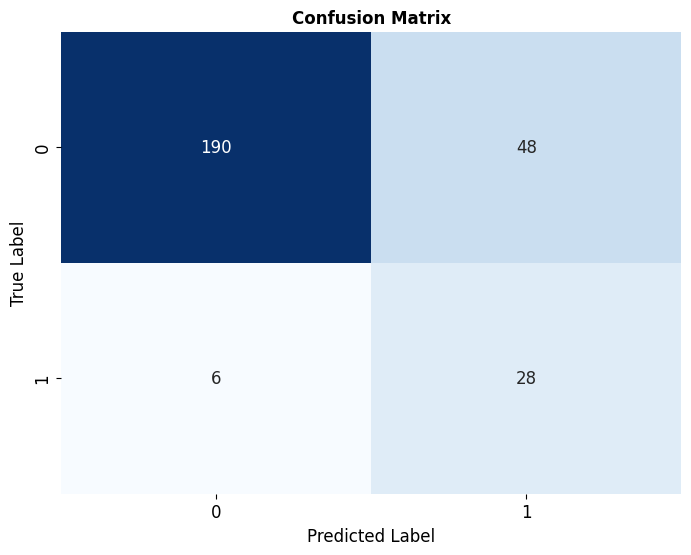

In [198]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix', fontweight = "bold")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

 The model correctly identified 190 **non-high-quality** wines and 28 **high-quality** wines.
  - However, it misclassified 48 non-high-quality wines as high quality and 6 high-quality wines as non-high qualit

In [199]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.80      0.88       238
           1       0.37      0.82      0.51        34

    accuracy                           0.80       272
   macro avg       0.67      0.81      0.69       272
weighted avg       0.89      0.80      0.83       272



The precision for the high-quality class is relatively low (0.37), which means that when the model predicts a wine as high quality, it’s correct only about 37% of the time. 

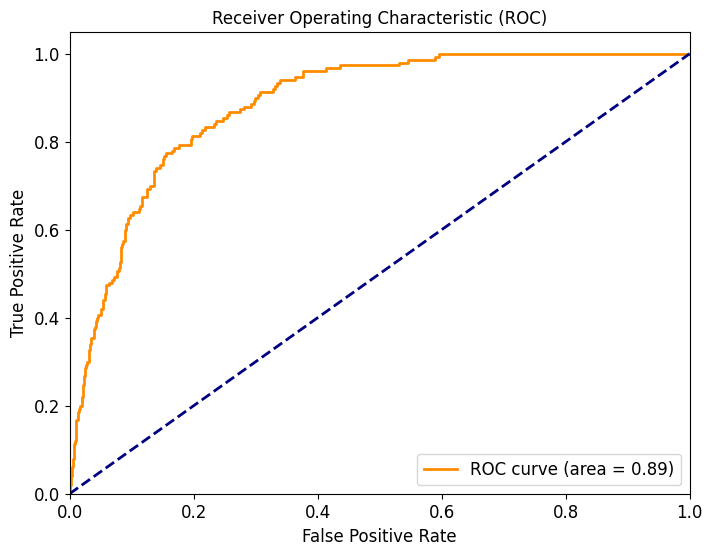

In [200]:
fpr, tpr, thresholds = roc_curve(y_train, logit_model.predict_proba(X_train)[:,1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

- **Trying different thresholds to see if metrics improves**

Results for Threshold: 0.5
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.80      0.88       238
           1       0.37      0.82      0.51        34

    accuracy                           0.80       272
   macro avg       0.67      0.81      0.69       272
weighted avg       0.89      0.80      0.83       272

Confusion Matrix:


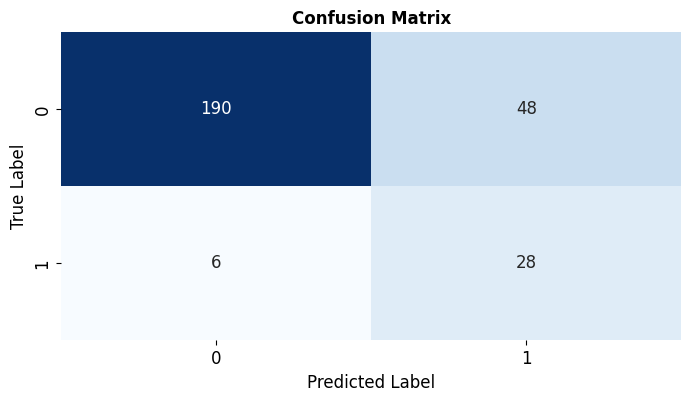

-----------------------------------------------------------------
----------------------------------------------------------------

Results for Threshold: 0.6
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.84      0.90       238
           1       0.41      0.76      0.54        34

    accuracy                           0.83       272
   macro avg       0.69      0.80      0.72       272
weighted avg       0.89      0.83      0.85       272

Confusion Matrix:


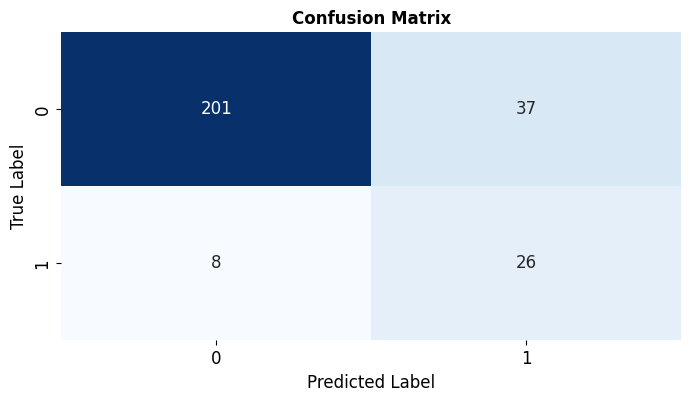

-----------------------------------------------------------------
----------------------------------------------------------------

Results for Threshold: 0.7
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.89      0.92       238
           1       0.47      0.71      0.56        34

    accuracy                           0.86       272
   macro avg       0.71      0.80      0.74       272
weighted avg       0.89      0.86      0.88       272

Confusion Matrix:


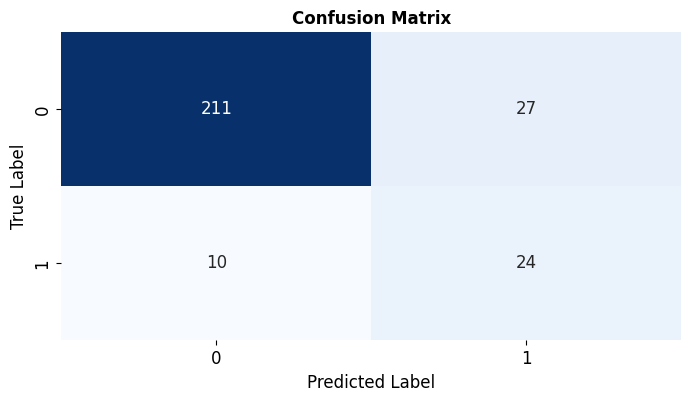

-----------------------------------------------------------------
----------------------------------------------------------------



In [201]:
thresholds_to_test = [0.5, 0.6, 0.7]

for threshold in thresholds_to_test:
    y_pred_manual_threshold = (y_pred_proba >= threshold).astype(int)
    
    print(f"Results for Threshold: {threshold}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred_manual_threshold))
    print("Confusion Matrix:")
    plt.figure(figsize=(8, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred_manual_threshold), annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title('Confusion Matrix', fontweight = "bold")
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()
    print("-----------------------------------------------------------------")
    print("----------------------------------------------------------------\n")

---

### Finding the best threshold 

Best Threshold: 0.7625163854772261
Precision at Best Threshold: 0.5333333333333333
Recall at Best Threshold: 0.7058823529411765
F1 Score at Best Threshold: 0.6075949367088608


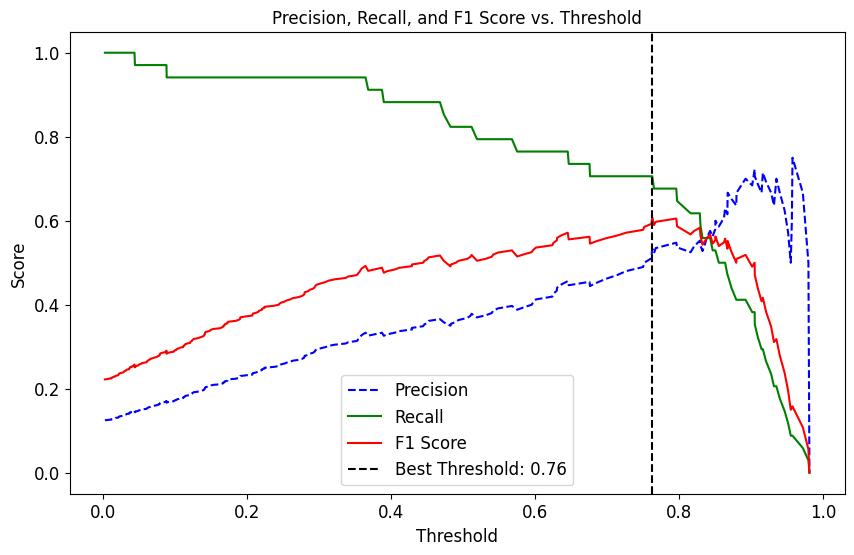

In [202]:
y_pred_proba = logit_model.predict_proba(X_test)[:, 1]

precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)


f1_scores = np.nan_to_num(2 * (precision * recall) / (precision + recall))

best_threshold_index = np.argmax(f1_scores)
best_threshold = thresholds[best_threshold_index]

print(f'Best Threshold: {best_threshold}')
print(f'Precision at Best Threshold: {precision[best_threshold_index]}')
print(f'Recall at Best Threshold: {recall[best_threshold_index]}')
print(f'F1 Score at Best Threshold: {f1_scores[best_threshold_index]}')

plt.figure(figsize=(10, 6))
plt.plot(thresholds, precision[:-1], 'b--', label='Precision')
plt.plot(thresholds, recall[:-1], 'g-', label='Recall')
plt.plot(thresholds, f1_scores[:-1], 'r-', label='F1 Score')
plt.axvline(x=best_threshold, color='k', linestyle='--', label=f'Best Threshold: {best_threshold:.2f}')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision, Recall, and F1 Score vs. Threshold')
plt.legend(loc='best')
plt.show()

In [203]:
y_pred_best_threshold = (y_pred_proba >= best_threshold).astype(int)


Confusion Matrix with Best Threshold:


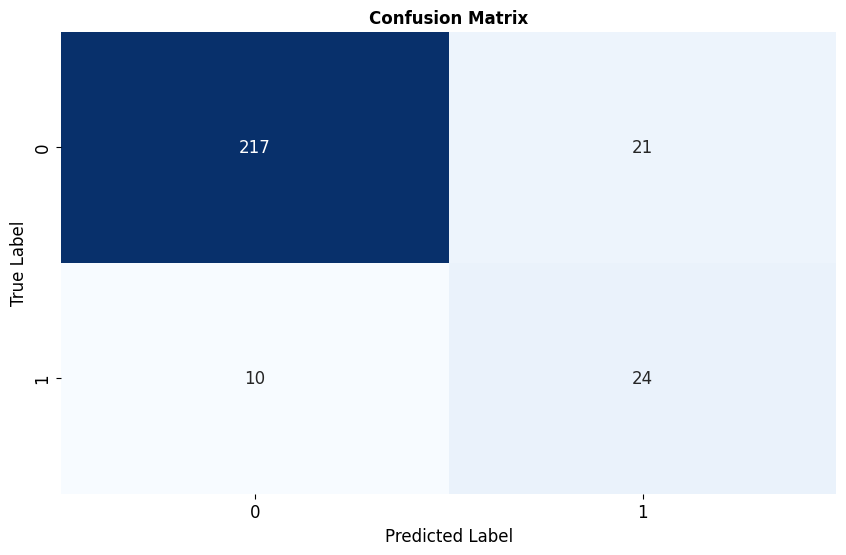

In [204]:
print("Confusion Matrix with Best Threshold:")
sns.heatmap(confusion_matrix(y_test, y_pred_best_threshold), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix', fontweight = "bold")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [205]:
print("Classification Report with Best Threshold:")
print(classification_report(y_test, y_pred_best_threshold))

Classification Report with Best Threshold:
              precision    recall  f1-score   support

           0       0.96      0.91      0.93       238
           1       0.53      0.71      0.61        34

    accuracy                           0.89       272
   macro avg       0.74      0.81      0.77       272
weighted avg       0.90      0.89      0.89       272



--------

Significant features in logistic regression

In [206]:
X_train_const = sm.add_constant(X_train) 

logit_model_sm = sm.Logit(y_train, X_train_const).fit()

print(logit_model_sm.summary())

Optimization terminated successfully.
         Current function value: 0.272063
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:           high_quality   No. Observations:                 1087
Model:                          Logit   Df Residuals:                     1075
Method:                           MLE   Df Model:                           11
Date:                Thu, 15 Aug 2024   Pseudo R-squ.:                  0.3221
Time:                        00:30:46   Log-Likelihood:                -295.73
converged:                       True   LL-Null:                       -436.22
Covariance Type:            nonrobust   LLR p-value:                 8.841e-54
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -2.8844      0.178    -16.203      0.000      -3.233      -2.536

### Logistic Regression Model Insights

- **Model Performance**:
  - **Accuracy**: 0.89 with the best threshold.
  - **Precision (class 1)**: 0.53; **Recall (class 1)**: 0.71; **F1-score (class 1)**: 0.61.
  - **Macro avg recall**: 0.81, indicating moderate performance for minority class (high-quality wines).

- **Threshold Adjustment**:
  - Improved recall for high-quality wines but decreased precision, highlighting the trade-off due to **data imbalance**.

- **Significant Predictors**: ( Assumptions need to be checked for inferring this)
  - Significant: **Volatile acidity, residual sugar, chlorides, total sulfur dioxide, sulphates, alcohol**.
  - Non-significant: **Fixed acidity, citric acid, free sulfur dioxide, density, pH**.

- **Recommendations**:
  - Address **data imbalance** with resampling techniques or models like Random Forests or SVM with class weights.
  - Use significant predictors to refine the model.


## Conclusion

---

**In this analysis of the Wine Quality dataset, several key insights were identified:**

1. **Key Predictors**: Alcohol content, volatile acidity, and sulphates were found to be the most significant predictors of wine quality. Alcohol content showed a strong positive correlation with quality, while volatile acidity had a negative correlation.
   
2. **Outliers and Skewness**: The dataset contained significant skewness and outliers in features like residual sugar, chlorides, and sulphates. These outliers were retained in the analysis to assess their impact.

3. **Model Performance**: The multiple linear regression models, even after attempts at transformation and adjustment, showed moderate predictive power and were not fully successful in meeting all regression assumptions. This suggests potential non-linear relationships in the data that could not be captured by linear models alone.

4. **Statistical Analysis**: A significant difference in alcohol content was observed between high-quality and low-quality wines, with the optimal alcohol content for high-quality wines being between 11.4% and 11.7%.

5. **Consumer and Winemaking Insights**: For consumers, wines with an alcohol content of 11.4%-11.7% are likely to be of higher quality. Winemakers might consider targeting this alcohol range to improve the quality of their wines.

---

### Next Steps

---

1. **Explore Non-Linear Models**: Given the limitations observed with linear regression, consider exploring non-linear models such as Random Forests, Gradient Boosting Machines, or Support Vector Machines to better capture the complexity of the relationships in the data.

2. **Feature Engineering**: Further feature engineering, such as creating interaction terms or polynomial features, may help in improving model performance.

3. **Outlier Treatment**: Re-examine the treatment of outliers. Consider using robust statistical methods or transformations that could mitigate the impact of outliers without removing potentially valuable data points.

4. **Cross-Validation**: Implement cross-validation techniques to better assess model performance and avoid overfitting.

5. **Explore Additional Variables**: If possible, gather more data or additional variables (e.g., vineyard, vintage year) that might provide more context and improve the predictive power of the models.

---
